# **Monitoring effectiveness of COVID-19 Vaccine Combinations in Thailand 2021-2022:**
# **Analysis of the whole country's dynamic cohort from the national registration**
Note that if you cannot run R in your jupyter environment, please access the following: 

# **Must read**

The data provided, were aggregated data. They cannot identify any individual.

**Preparation**

Install libraries for data analysis

In [ ]:
install.packages("tidyverse")
install.packages("data.table")
install.packages("readxl")
install.packages("lubridate")
install.packages("stringr")
install.packages("survminer")
install.packages("epiDisplay")
install.packages("ggrepel")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspec

Import the essential libraries

In [ ]:
library(tidyverse)
library(readxl)
library(stringr)
library(lubridate)
library(epiDisplay)
library(data.table)
library(ggrepel)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: foreign

Loading required package: survival

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: nnet


Attaching package: ‘epiDisplay’


The following object is masked from ‘package:ggplot2’:

    alpha



Attaching package: ‘data.table’


The followi

**Import data**

Note that we import data from an online source that can be expired. Data will be re-uploaded upon written request to the corresponding author.

*import claim data*

In [ ]:
options(warn=-1)
temp <- tempfile()
download.file("https://drive.google.com/uc?id=1hlURc5J3-1G4owsDIo6nJlGpUsAHW6bA&authuser=0&export=download&confirm=t&uuid=d20bf4f8-4bfb-4cc9-9c54-455d9776b9c2", temp)
cvtab<-fread(temp)
names(cvtab)<-tolower(names(cvtab))
options(warn=0)

Let's explore data

In [ ]:
glimpse(cvtab)

Rows: 6,390,384
Columns: 12
$ province_household <chr> "กรุงเทพมหานคร", "กรุงเทพมหานคร", "กรุงเทพมหานคร", "กรุ…
$ agegroup           <chr> "21-40", "21-40", "21-40", "21-40", "21-40", "21-40…
$ gender             <chr> "ชาย", "ชาย", "ชาย", "ชาย", "ชาย", "ชาย", "ชาย", "ช…
$ vac_type           <chr> "AZ", "AZ", "AZ", "AZ", "AZ", "AZ", "AZ", "AZ", "AZ…
$ inf_type           <chr> "Infect", "Infect", "Infect", "Infect", "Infect", "…
$ vac_date           <chr> "2021-05", "2021-05", "2021-05", "2021-05", "2021-0…
$ inf_date           <chr> "2021-07", "2021-08", "2021-09", "2021-10", "2021-1…
$ a                  <int> 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1165, 339, 1…
$ b                  <int> 9492, 10370, 3898, 2496, 1722, 1483, 9390, 13250, 1…
$ c                  <int> 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 897, 558, 54…
$ d                  <dbl> 664846, 663968, 670440, 671842, 672616, 672855, 664…
$ health_region      <chr> "เขตที่ 13 กรุงเทพมหานคร", "เขตที่ 13 กรุงเทพมหานคร", "เข…


# **Data manipulation**

**Create factors for stratification analysis according to Mantel-Haenszel stratification method**

Ref: Rothman, K.J., Greenland, S. and Lash, T. (2008) Modern epidemiology. Third Edition. Lippincott Williams & Wilkins, Philadelphia, 274-278.

In [ ]:
stratum<-cvtab %>% mutate(Ni = as.numeric(a+c),
                            N0 = as.numeric(b+d),
                            Mi = as.numeric(a+b),
                            M0 = as.numeric(c+d),
                            total = as.numeric(a+b+c+d))
stratum<-stratum %>% mutate(ufactor = a*N0/total, lfactor = b*Ni/total)
stratum<-stratum %>% mutate(vfactor = (Mi*Ni*N0/(total^2))-(a*b/total))
stratum<-stratum %>% mutate(xfactor = Ni*Mi/total,yfactor= Ni*Mi*N0*M0/(total^2*(total-1)))
stratum<-stratum %>% mutate(month = round(interval(ymd(paste(vac_date,"01",sep="-")),
                                             ymd(paste(inf_date,"01",sep="-")))/duration(30,"days"),0))

We exclude SAR-CoV-2 infection after 1 Dec 2021 because individuals with suspected SAR-CoV-2 infection could be confirmed by ATK.

Ref: https://ddc.moph.go.th/viralpneumonia/file/g_srrt/g_srrt_221264.pdf

In [ ]:
stratum<-stratum[inf_type != "Infect"]

**Calculate vaccine effectiveness for each regimen in time series after complete vaccination**

In [ ]:
ve<-stratum %>% group_by(vac_type,inf_type,month) %>%
  summarise(rrmh=sum(ufactor)/sum(lfactor),
            lnvar =sum(vfactor)/(sum(ufactor)*sum(lfactor)),
            z =abs((sum(a)-sum(xfactor))/sqrt(sum(yfactor)))) %>% as.data.table()
ve<-ve %>% mutate(power=pnorm(z-qnorm(1-0.05/2))+pnorm(-z-qnorm(1-0.05/2))) %>% as.data.table()

`summarise()` has grouped output by 'vac_type', 'inf_type'. You can override
using the `.groups` argument.


**Select only the vaccine regimens with adequate sample size**

Power >= 0.8

In [ ]:
ve<-ve[power>=0.8]

Calculate confidence interval and exclude extreme interval [CI should not be infinite]

In [ ]:
ve <- ve %>% mutate(rrmh_lower = exp(log(rrmh)-qnorm(1-0.05/2)*sqrt(lnvar)),
                          rrmh_upper = exp(log(rrmh)+qnorm(1-0.05/2)*sqrt(lnvar)))
ve <- ve %>% mutate(VE = (1-rrmh)*100,
                          lower_VE = (1-rrmh_upper)*100,
                          upper_VE = (1-rrmh_lower)*100)
ve<-ve[lower_VE!="NaN"]
ve<-ve[upper_VE!="NaN"]

Creating dose number

In [ ]:
ve$dose<-str_count(ve$vac_type, pattern = "-")+1

## **Visualization**

*Set colors*

In [ ]:
safe_colorblind_palette <- c("dark red", "#E69F00", "#56B4E9", "#009E73", 
                             "#0072B2", "#D55E00", "#CC79A7")

**2-dose regimen against severe COVID-19**

Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


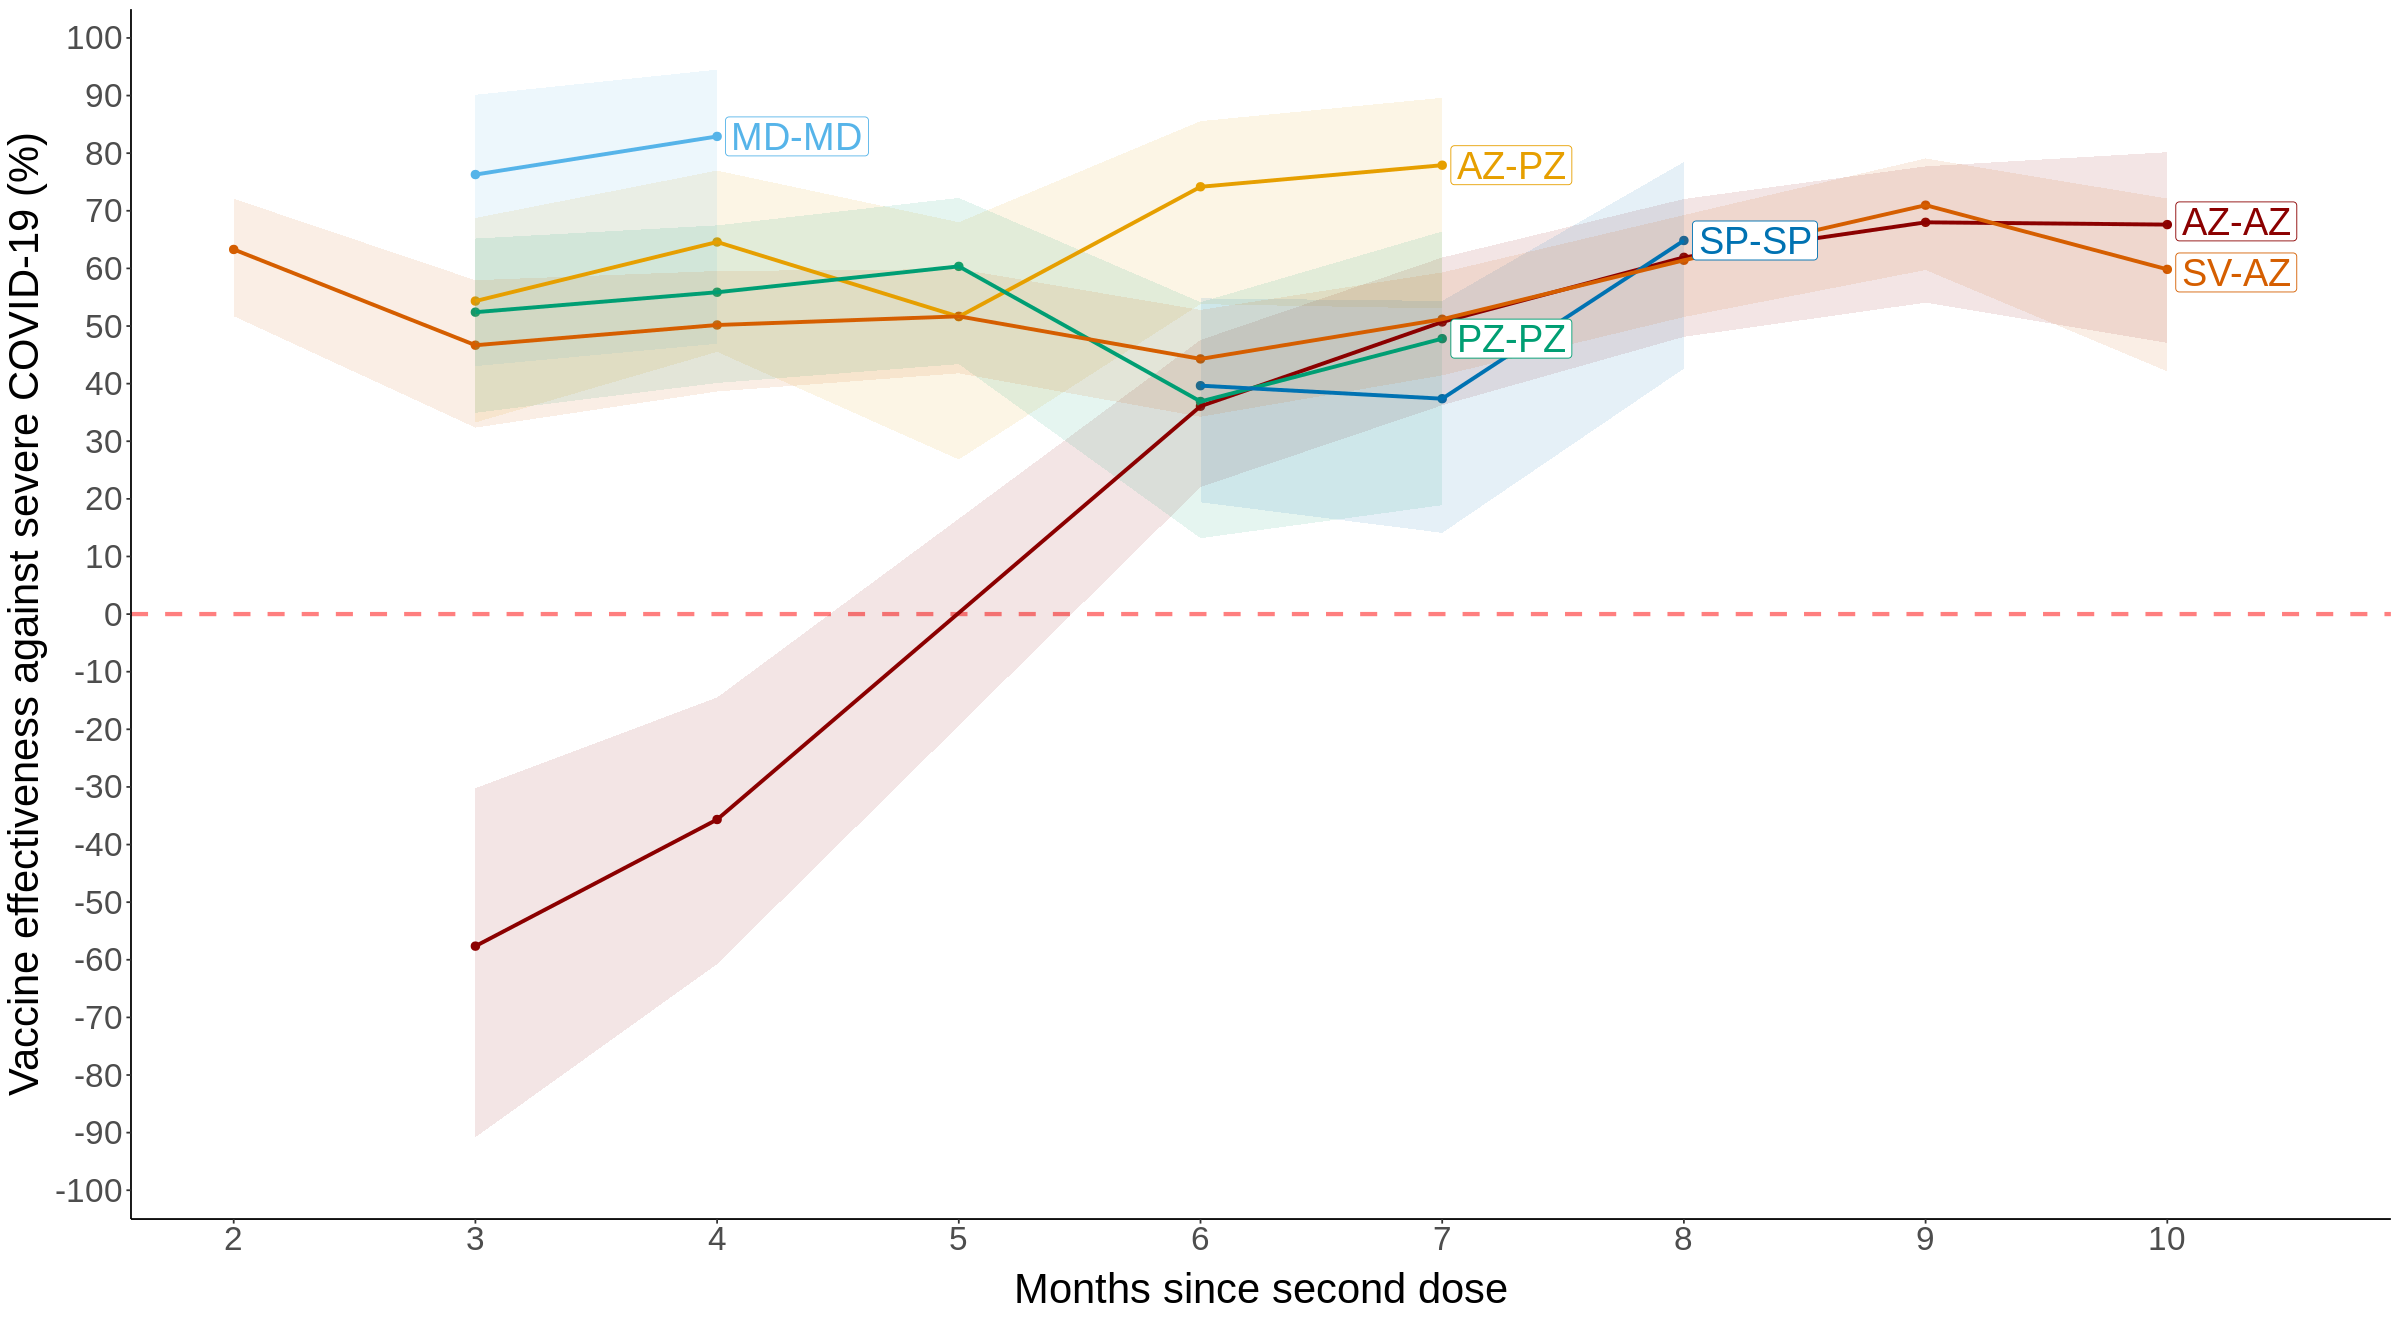

In [ ]:
options(repr.plot.width=20, repr.plot.height=11)
ve_severe_d2<-ve[inf_type=="Severe" & dose==2]
ggplot(ve_severe_d2)+
  geom_hline(yintercept = 0,col="red",linetype=2,size=1.2,alpha=0.5)+
  geom_point(aes(x=month,y=VE,col=vac_type),size=2,show.legend = FALSE)+
  geom_ribbon(aes(x=month,y=VE,ymax=upper_VE,ymin=lower_VE,group=vac_type,fill=vac_type),alpha=0.1,show.legend = FALSE)+
  geom_line(aes(x=month,y=VE,col=vac_type),size=1.1,show.legend = FALSE)+
  geom_label_repel(data = unique(ve_severe_d2[order(-month)],by=c("vac_type")),
                   aes(label = vac_type,x=month,y=VE,col=vac_type),
                   nudge_x = 0.25,
                   size=8,
                   na.rm = TRUE,show.legend = FALSE)+
  scale_fill_manual(values = safe_colorblind_palette)+
  scale_color_manual(values = safe_colorblind_palette)+
  scale_x_continuous(breaks = 1:max(ve_severe_d2$month),limits = c(2,max(ve_severe_d2$month)+0.5),name = "Months since second dose")+
  scale_y_continuous(expand=c(0,0), limits = c(-105,105),breaks = c(1:10*-10,0:10*10),name = "Vaccine effectiveness against severe COVID-19 (%)")+
  theme_classic()+
  theme(axis.text.x = element_text(size=20),
        axis.title.x = element_text(size=25,margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.y = element_text(size=20),
        axis.title.y = element_text(size=25,margin = margin(t = 0, r = 5, b = 0, l = 0)))

**3-dose regimen against severe COVID-19**

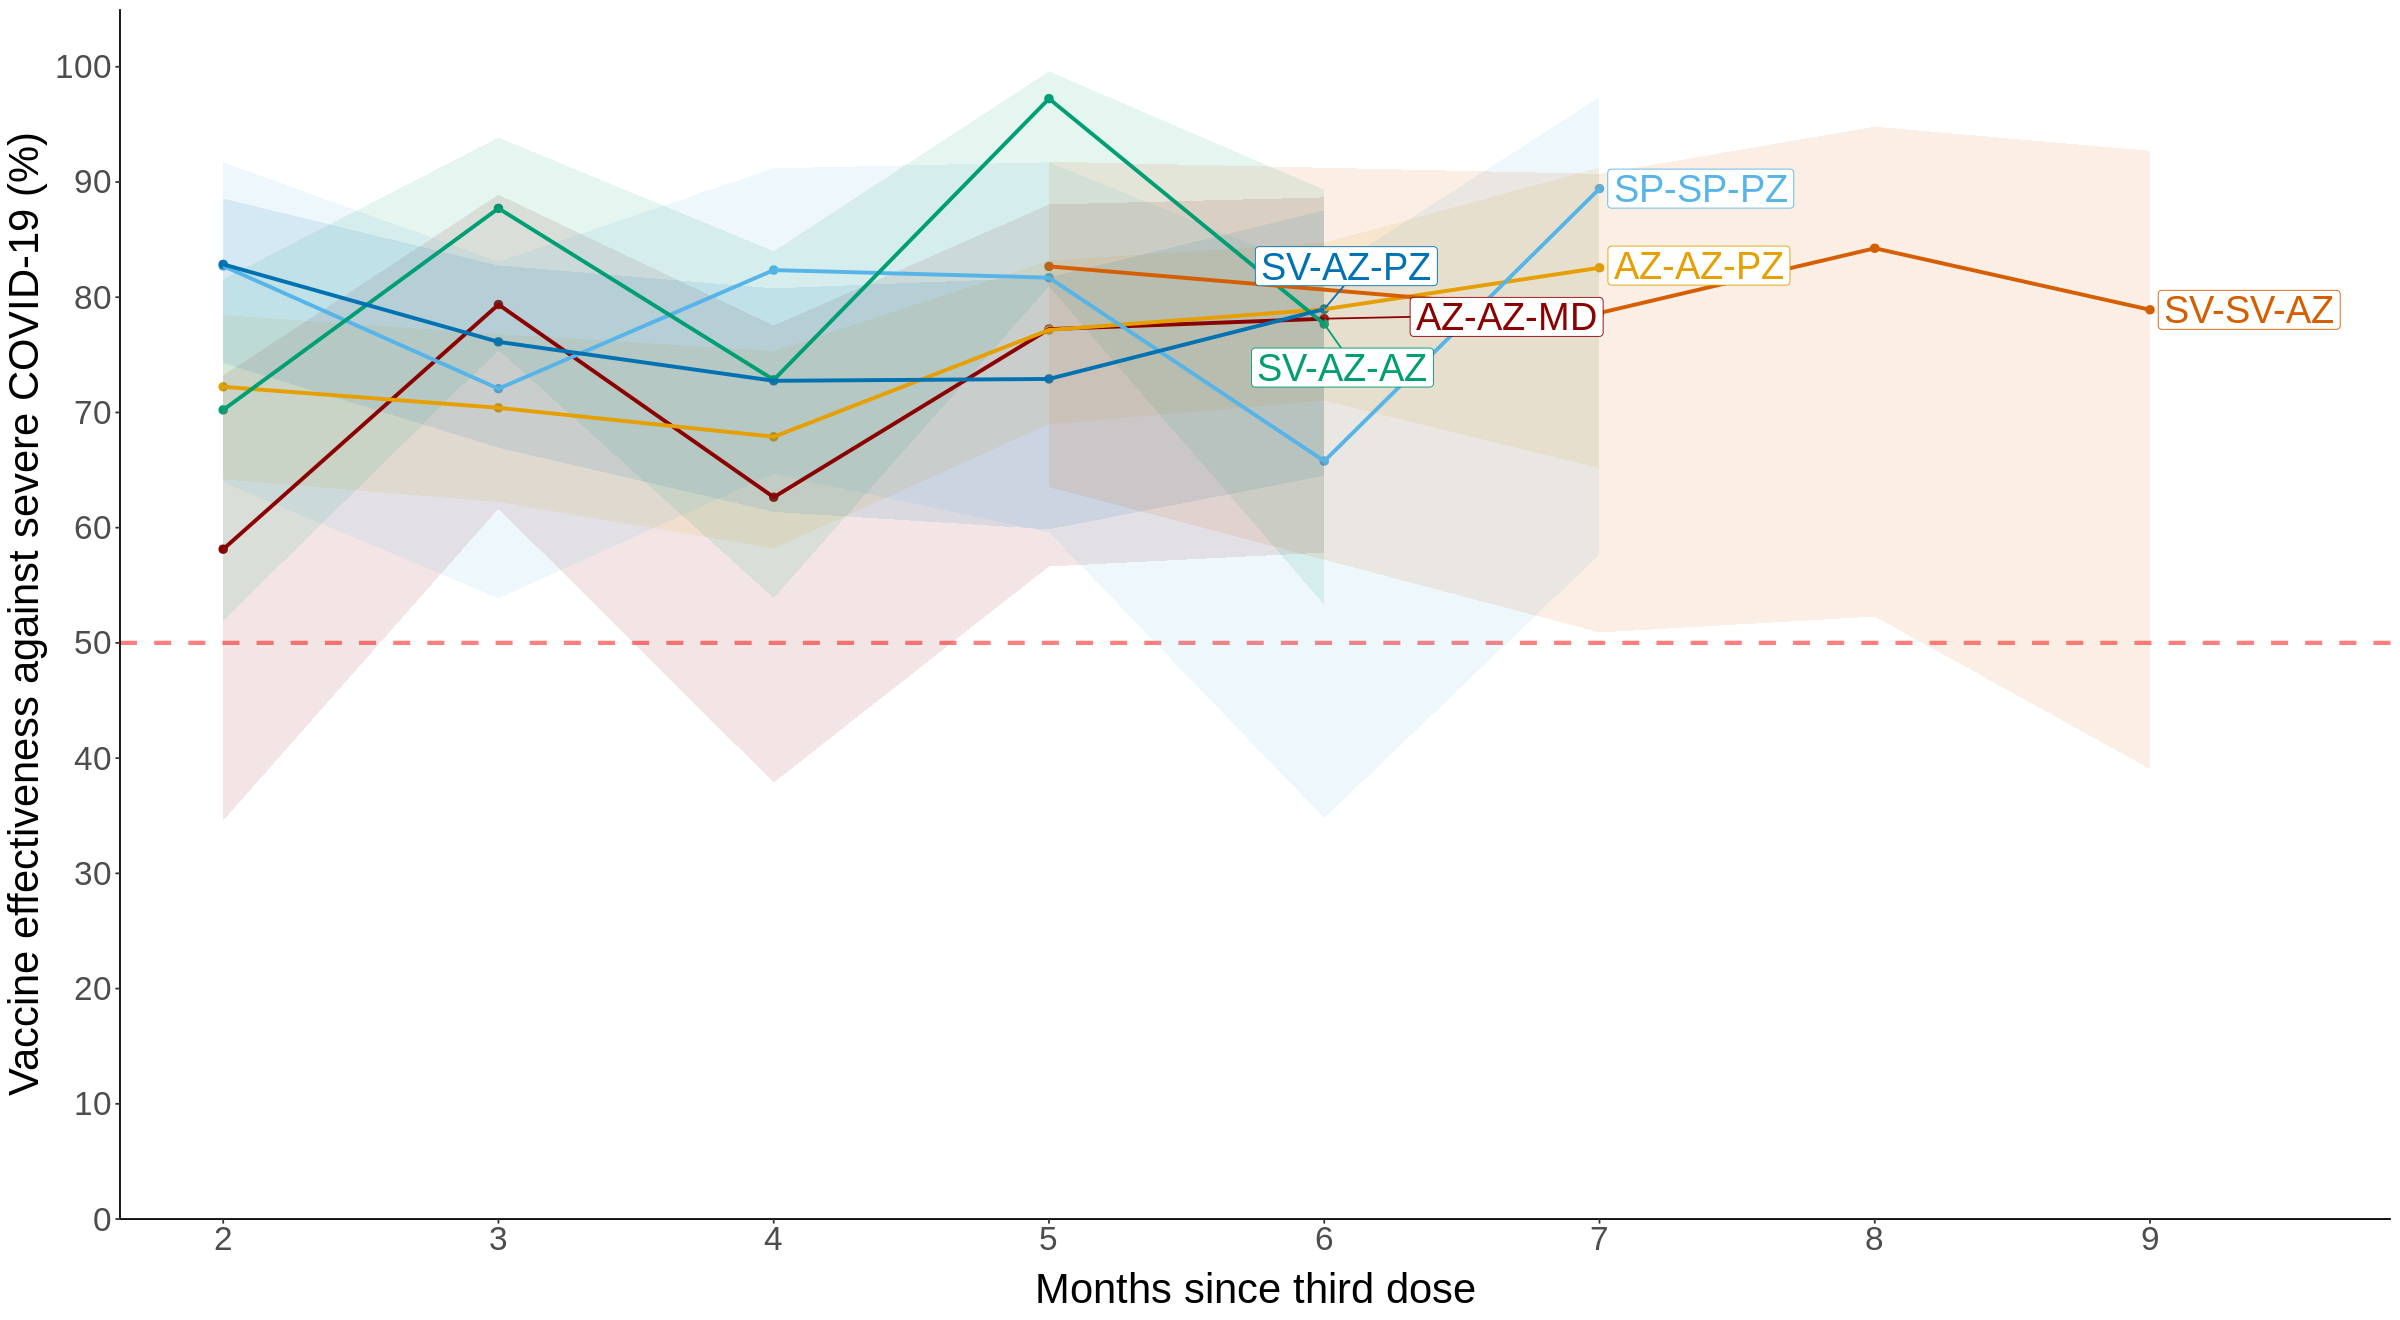

In [ ]:
ve_severe_d3<-ve[inf_type=="Severe" & dose==3]
ggplot(ve_severe_d3)+
  geom_hline(yintercept = 50,col="red",linetype=2,size=1.2,alpha=0.5)+
  geom_point(aes(x=month,y=VE,col=vac_type),size=2,show.legend = FALSE)+
  geom_ribbon(aes(x=month,y=VE,ymax=upper_VE,ymin=lower_VE,group=vac_type,fill=vac_type),alpha=0.1,show.legend = FALSE)+
  geom_line(aes(x=month,y=VE,col=vac_type),size=1.1,show.legend = FALSE)+
  geom_label_repel(data = unique(ve_severe_d3[order(-month)],by=c("vac_type")),
                   aes(label = vac_type,x=month,y=VE,col=vac_type),
                   nudge_x = 0.25,
                   size=8,
                   na.rm = TRUE,show.legend = FALSE)+
  scale_fill_manual(values = safe_colorblind_palette)+
  scale_color_manual(values = safe_colorblind_palette)+
  scale_x_continuous(breaks = 1:max(ve_severe_d3$month),limits = c(2,max(ve_severe_d3$month)+0.5),name = "Months since third dose")+
  scale_y_continuous(expand=c(0,0), limits = c(0,105),breaks = 0:10*10,name = "Vaccine effectiveness against severe COVID-19 (%)")+
  theme_classic()+
  theme(axis.text.x = element_text(size=20),
        axis.title.x = element_text(size=25,margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.y = element_text(size=20),
        axis.title.y = element_text(size=25,margin = margin(t = 0, r = 5, b = 0, l = 0)))

**2-dose regimen against death from COVID-19**

Warning message:
“Removed 8 rows containing missing values (geom_point).”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Removed 8 row(s) containing missing values (geom_path).”


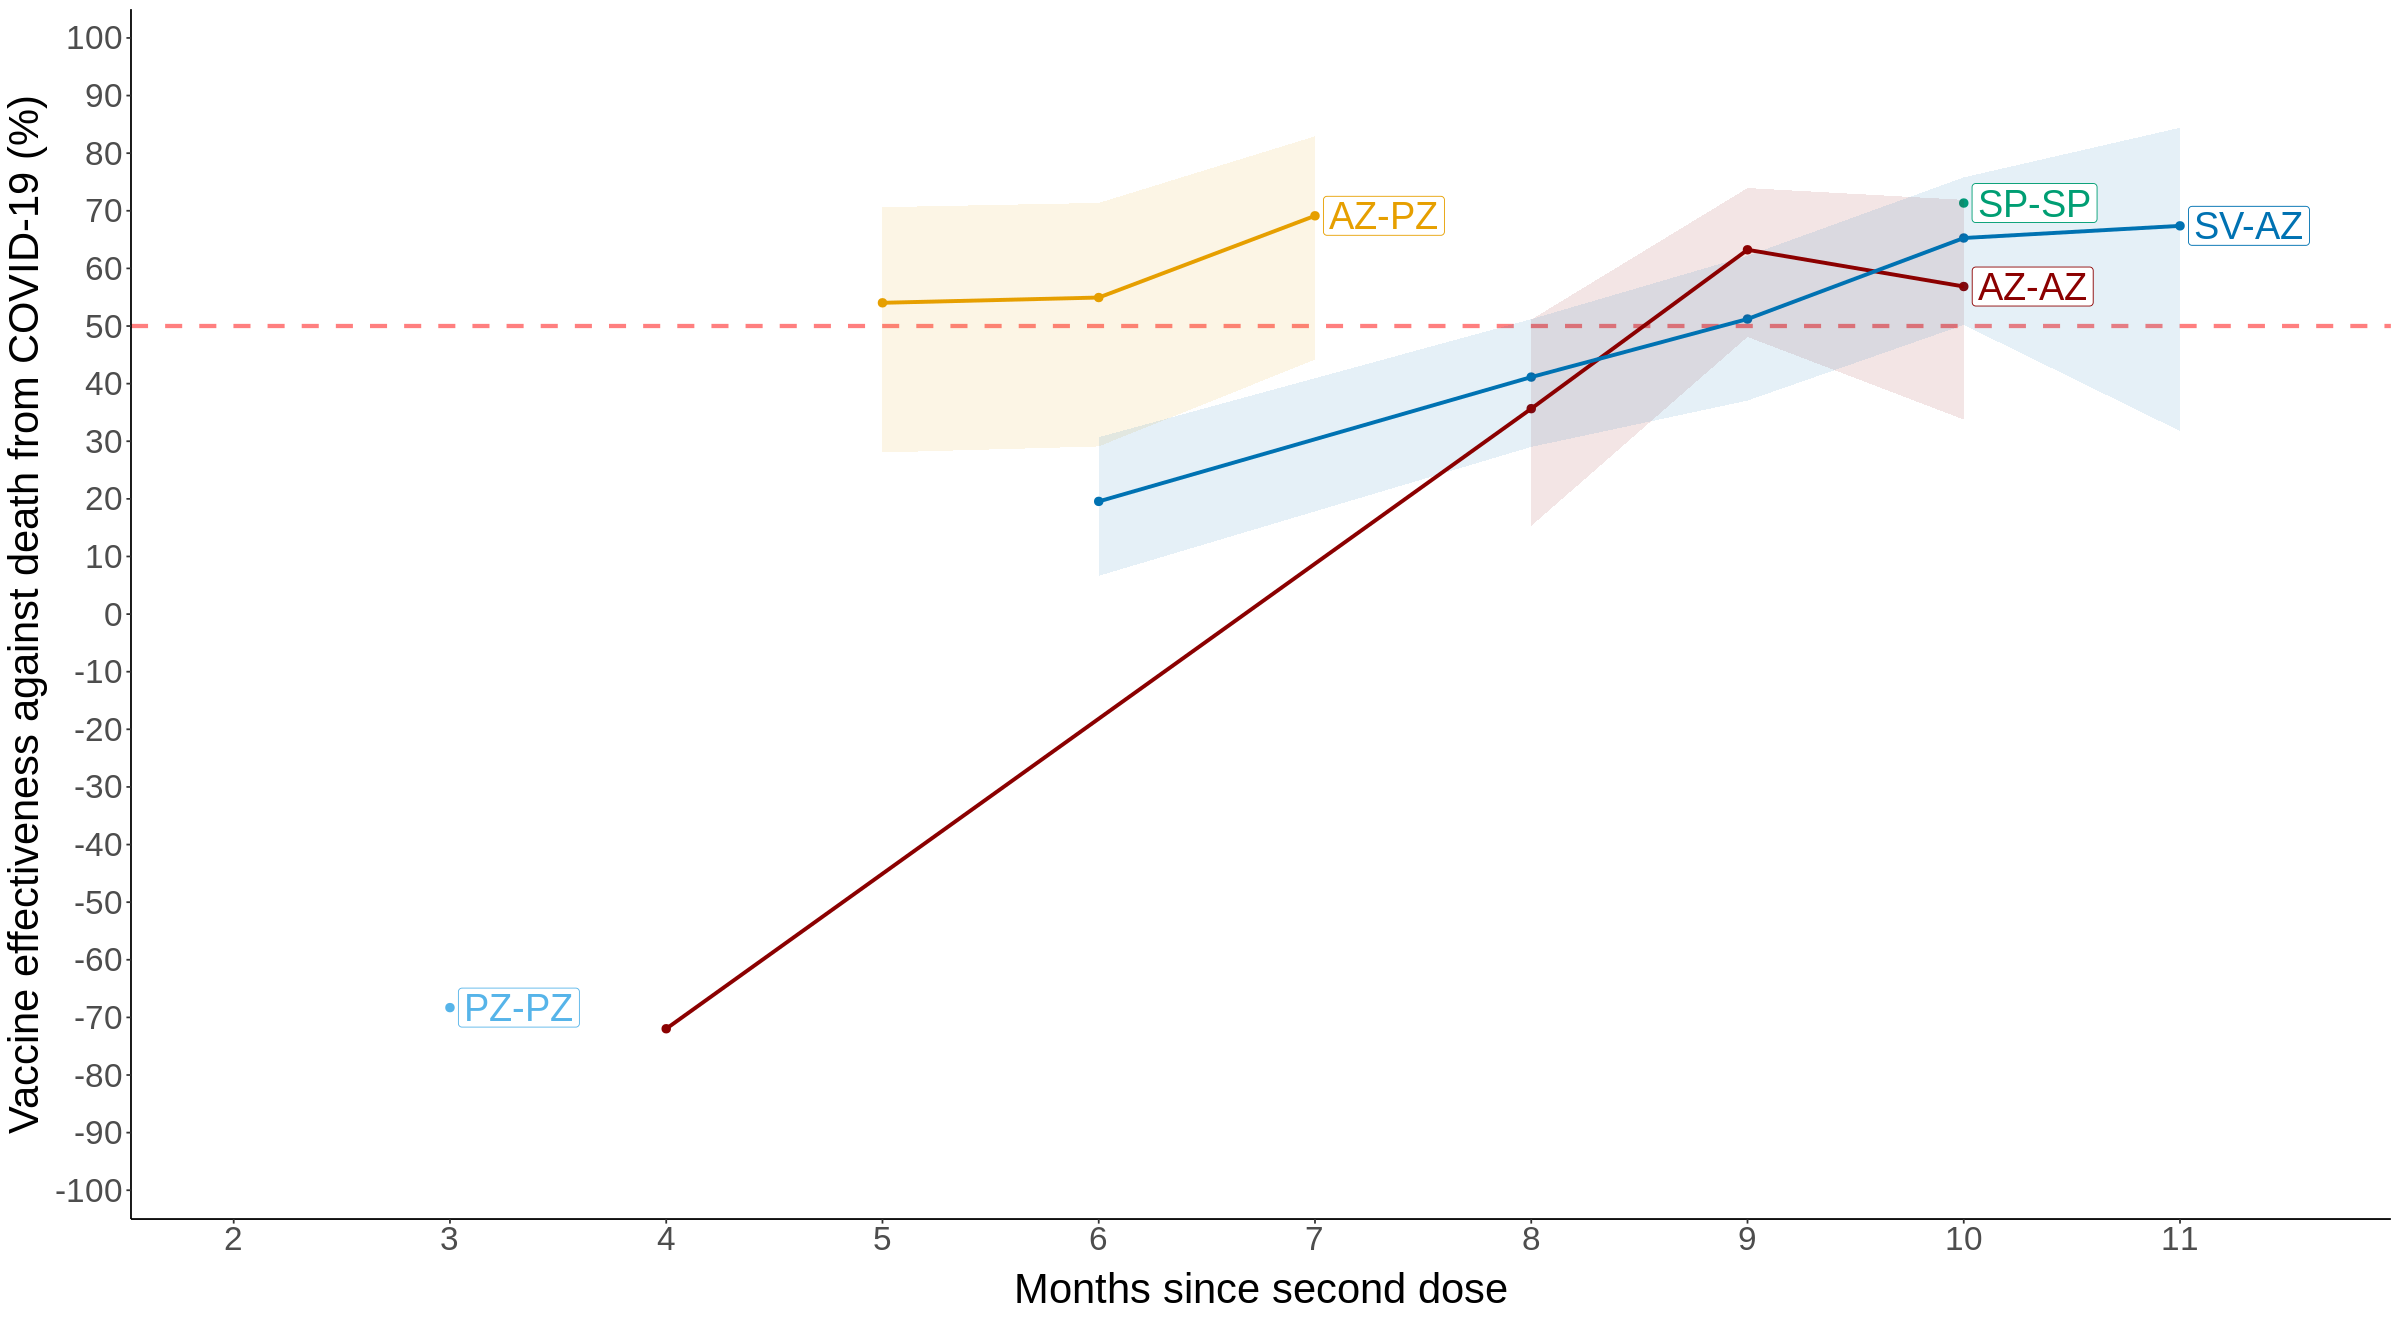

In [ ]:
ve_death_d2<-ve[inf_type=="Death" & dose==2]
ggplot(ve_death_d2)+
  geom_hline(yintercept = 50,col="red",linetype=2,size=1.2,alpha=0.5)+
  geom_point(aes(x=month,y=VE,col=vac_type),size=2,show.legend = FALSE)+
  geom_ribbon(aes(x=month,y=VE,ymax=upper_VE,ymin=lower_VE,group=vac_type,fill=vac_type),alpha=0.1,show.legend = FALSE)+
  geom_line(aes(x=month,y=VE,col=vac_type),size=1.1,show.legend = FALSE)+
  geom_label_repel(data = unique(ve_death_d2[order(-month)],by=c("vac_type")),
                   aes(label = vac_type,x=month,y=VE,col=vac_type),
                   nudge_x = 0.25,
                   size=8,
                   na.rm = TRUE,show.legend = FALSE)+
  scale_fill_manual(values = safe_colorblind_palette)+
  scale_color_manual(values = safe_colorblind_palette)+
  scale_x_continuous(breaks = 1:max(ve_death_d2$month),limits = c(2,max(ve_death_d2$month)+0.5),name = "Months since second dose")+
  scale_y_continuous(expand=c(0,0), limits = c(-105,105),breaks = c(1:10*-10,0:10*10),name = "Vaccine effectiveness against death from COVID-19 (%)")+
  theme_classic()+
  theme(axis.text.x = element_text(size=20),
        axis.title.x = element_text(size=25,margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.y = element_text(size=20),
        axis.title.y = element_text(size=25,margin = margin(t = 0, r = 5, b = 0, l = 0)))

**3-dose regimen against death from COVID-19**

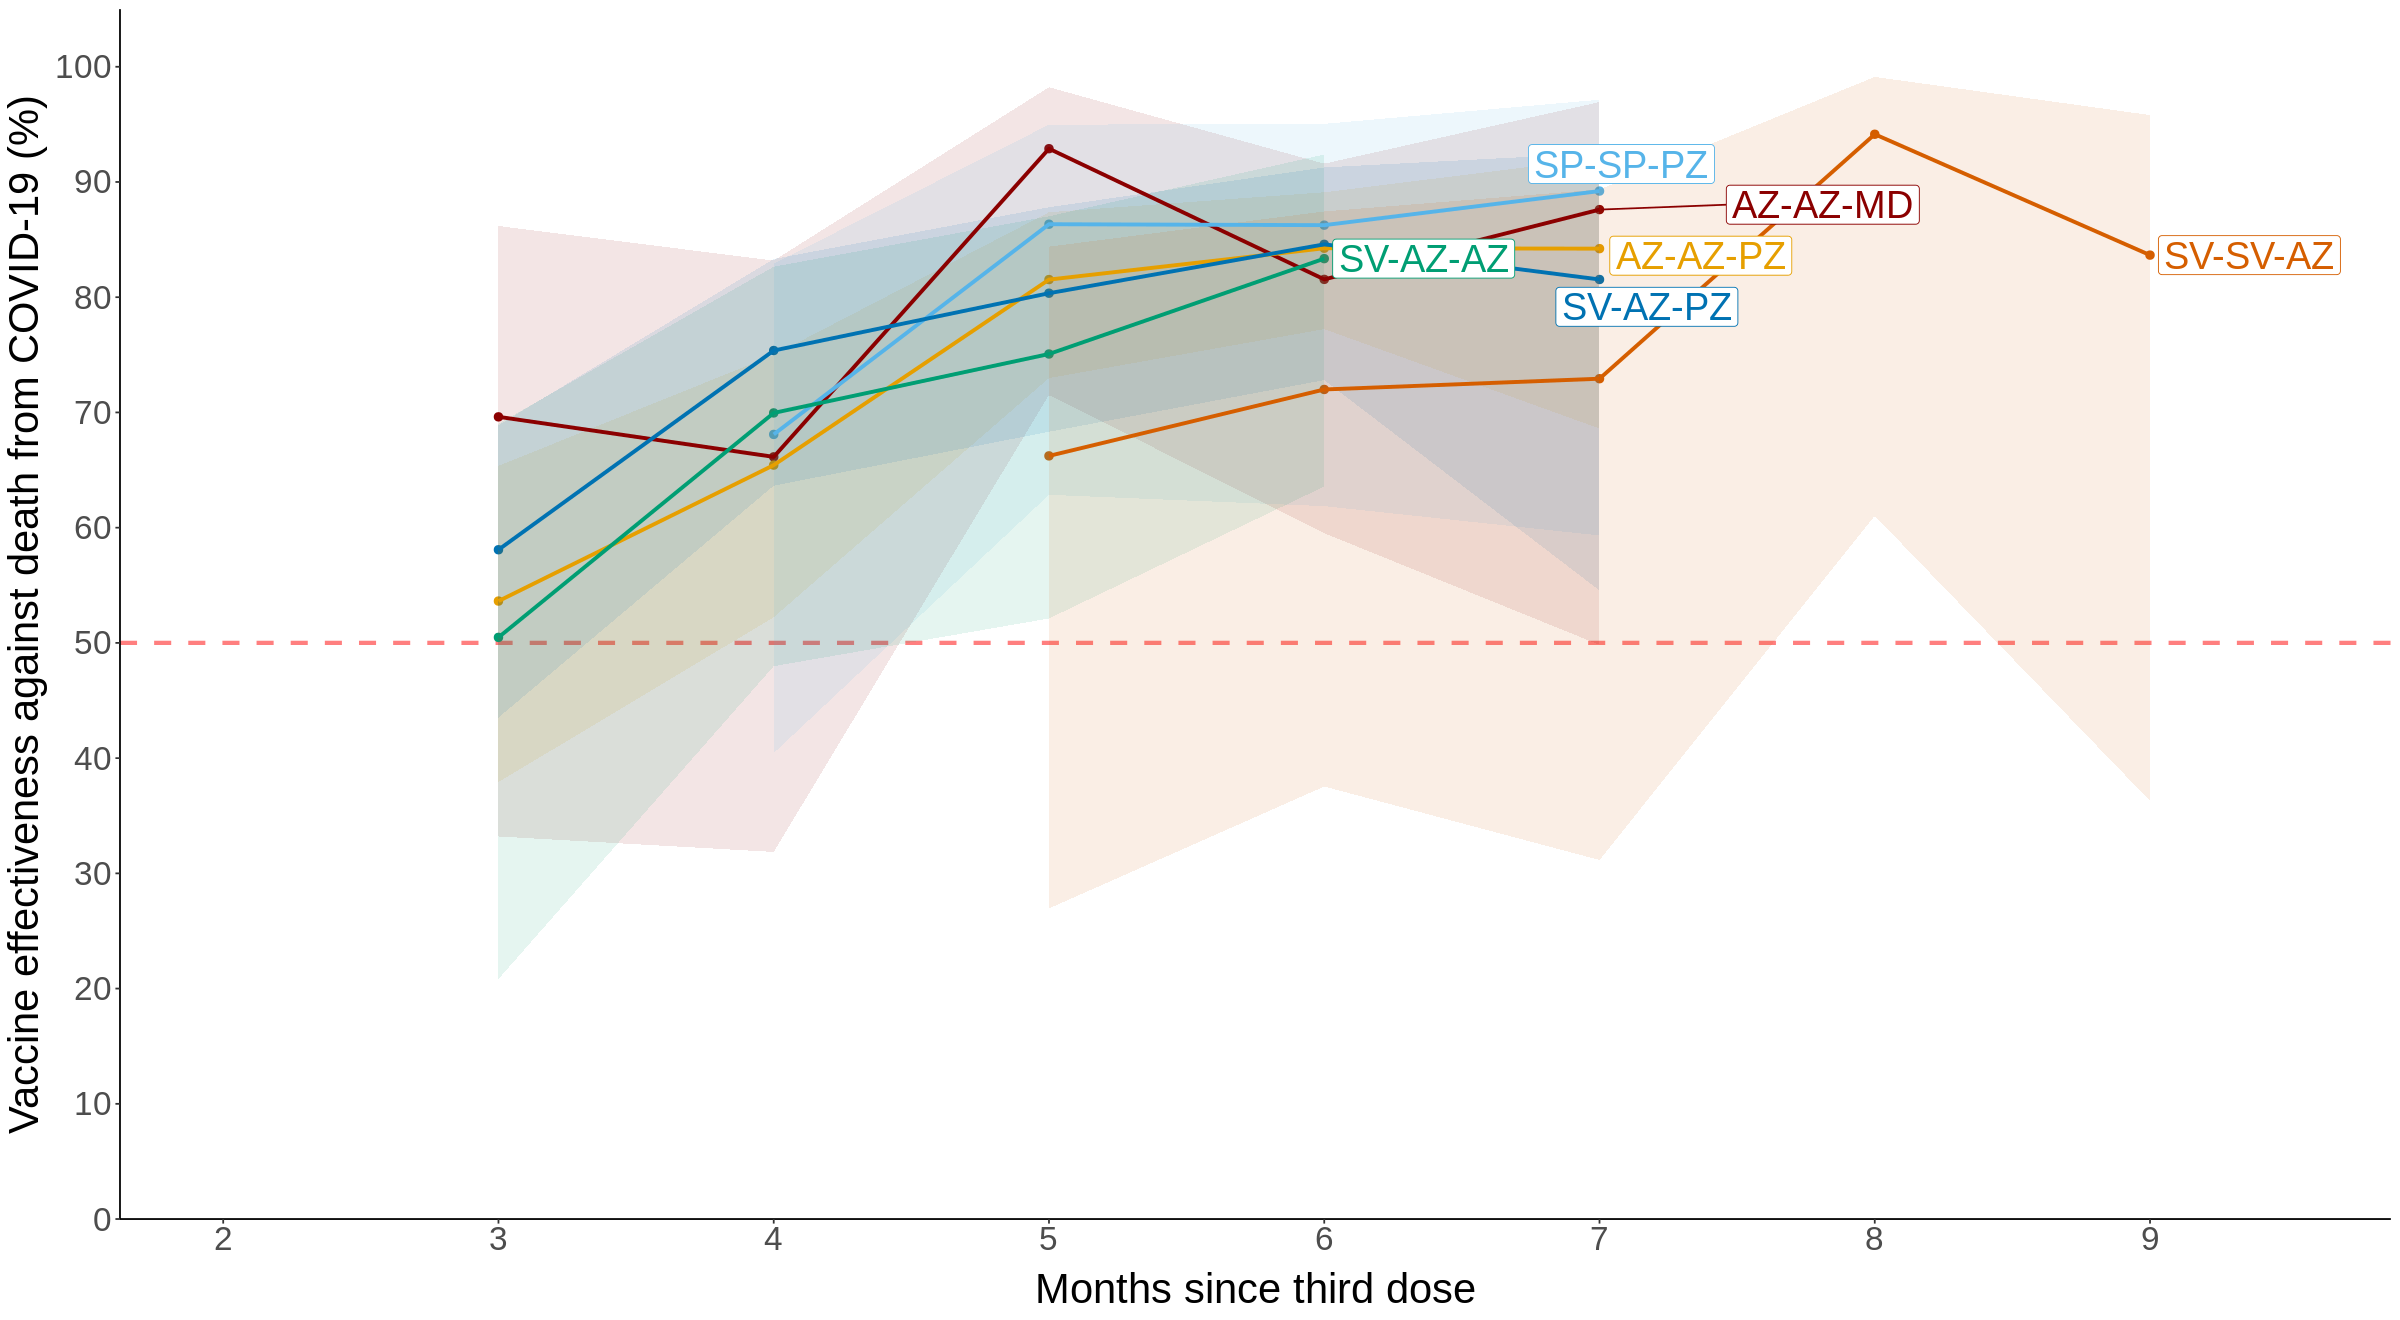

In [ ]:
ve_death_d3<-ve[inf_type=="Death" & dose==3]
ggplot(ve_death_d3)+
  geom_hline(yintercept = 50,col="red",linetype=2,size=1.2,alpha=0.5)+
  geom_point(aes(x=month,y=VE,col=vac_type),size=2,show.legend = FALSE)+
  geom_ribbon(aes(x=month,y=VE,ymax=upper_VE,ymin=lower_VE,group=vac_type,fill=vac_type),alpha=0.1,show.legend = FALSE)+
  geom_line(aes(x=month,y=VE,col=vac_type),size=1.1,show.legend = FALSE)+
  geom_label_repel(data = unique(ve_death_d3[order(-month)],by=c("vac_type")),
                   aes(label = vac_type,x=month,y=VE,col=vac_type),
                   nudge_x = 0.25,
                   size=8,
                   na.rm = TRUE,show.legend = FALSE)+
  scale_fill_manual(values = safe_colorblind_palette)+
  scale_color_manual(values = safe_colorblind_palette)+
  scale_x_continuous(breaks = 1:max(ve_death_d3$month),limits = c(2,max(ve_death_d3$month)+0.5),name = "Months since third dose")+
  scale_y_continuous(expand=c(0,0), limits = c(0,105),breaks = 0:10*10,name = "Vaccine effectiveness against death from COVID-19 (%)")+
  theme_classic()+
  theme(axis.text.x = element_text(size=20),
        axis.title.x = element_text(size=25,margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.y = element_text(size=20),
        axis.title.y = element_text(size=25,margin = margin(t = 0, r = 5, b = 0, l = 0)))

# **Select major vaccine sequences**

In [ ]:
stratum<-stratum[vac_type %in% c("AZ-PZ","SV-AZ", "AZ-AZ-MD", "AZ-AZ-PZ","SP-SP-PZ","SV-AZ-AZ","SV-AZ-PZ")]

stratum$dose<-str_count(stratum$vac_type, pattern = "-")+1

# **Regression model for 2-dose vaccination against severe COVID-19**

Manipulate data for regression analysis

In [ ]:
d2_severe<-stratum[inf_type=="Severe" & dose == 2]
d2_severe<-d2_severe[,c("province_household", "agegroup", "gender", "vac_type", "inf_type", "vac_date", "inf_date","month","a","b","c","d")]
d2_severe$male<-d2_severe$gender=="ชาย"

d2_severe_a<-d2_severe[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","a")]
names(d2_severe_a)[7]<-"Freq"
d2_severe_a$severe<-TRUE


d2_severe_b<-d2_severe[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","b")]
names(d2_severe_b)[7]<-"Freq"
d2_severe_b$vac_type<-"None"
d2_severe_b<-unique(d2_severe_b,by=c("province_household", "agegroup", "male", "vac_date", "month"))
d2_severe_b$severe<-TRUE


d2_severe_c<-d2_severe[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","c")]
names(d2_severe_c)[7]<-"Freq"
d2_severe_c$severe<-FALSE

d2_severe_d<-d2_severe[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","d")]
names(d2_severe_d)[7]<-"Freq"
d2_severe_d$vac_type<-"None"
d2_severe_d<-unique(d2_severe_d,by=c("province_household", "agegroup", "male", "vac_date", "month"))
d2_severe_d$severe<-FALSE

d2_s<-rbind(d2_severe_a,d2_severe_b,d2_severe_c,d2_severe_d)

In [ ]:
d2_s$agegroup<-factor(d2_s$agegroup,levels = c("21-40","12-20","41-60","61-80","Over 80"))
d2_s$vac_type<-factor(d2_s$vac_type,levels=c("None","AZ-PZ","SV-AZ"))
d2_s$vac_date<-factor(d2_s$vac_date,levels = c("2021-05","2021-06","2021-07","2021-08","2021-09",
                                               "2021-10","2021-11","2021-12","2022-01","2022-02",
                                               "2022-03","2022-04"))
namep<-unique(d2_s[province_household !="กรุงเทพมหานคร"]$province_household)
d2_s$province_household<-factor(d2_s$province_household,levels = c("กรุงเทพมหานคร",namep)) #Bangkok, the capital, as a reference

In [ ]:
model_d2_s_simple<-glm(severe ~ vac_type+vac_date+male+agegroup+province_household+month, binomial, weight=Freq, data=d2_s) 
logistic.display(model_d2_s_simple)

,crude OR(95%CI),adj. OR(95%CI),P(Wald's test),P(LR-test)
vac_type: ref.=None,,,,< 0.001
AZ-PZ,"0.52 (0.44,0.63)","0.44 (0.37,0.53)",< 0.001,
SV-AZ,"0.48 (0.45,0.52)","0.46 (0.43,0.5)",< 0.001,
,,,,
vac_date: ref.=2021-05,,,,< 0.001
2021-06,"0.91 (0.88,0.93)","0.93 (0.91,0.96)",< 0.001,
2021-07,"0.84 (0.82,0.87)","0.91 (0.88,0.94)",< 0.001,
2021-08,"0.99 (0.96,1.02)","1.08 (1.05,1.12)",< 0.001,
2021-09,"1.11 (1.07,1.15)","1.16 (1.12,1.2)",< 0.001,
2021-10,"1.23 (1.18,1.27)","1.19 (1.14,1.23)",< 0.001,


Model using time interaction with type of vaccine sequence and month of vaccination

In [ ]:
model_d2_s_wti<-glm(severe ~ vac_type*month+vac_date*month+male+agegroup+
              province_household, binomial, weight=Freq, data=d2_s) 
summary(model_d2_s_wti)


Call:
glm(formula = severe ~ vac_type * month + vac_date * month + 
    male + agegroup + province_household, family = binomial, 
    data = d2_s, weights = Freq)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-13.648   -0.075    0.000    0.000   48.865  

Coefficients:
                                 Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                     -9.948097   0.023154 -429.647  < 2e-16 ***
vac_typeAZ-PZ                   -0.212074   0.238998   -0.887 0.374893    
vac_typeSV-AZ                   -0.498521   0.097024   -5.138 2.77e-07 ***
month                           -0.153771   0.002527  -60.844  < 2e-16 ***
vac_date2021-06                 -0.339423   0.027296  -12.435  < 2e-16 ***
vac_date2021-07                 -0.943395   0.032637  -28.906  < 2e-16 ***
vac_date2021-08                 -1.049958   0.037128  -28.280  < 2e-16 ***
vac_date2021-09                 -1.280662   0.044040  -29.079  < 2e-16 ***
vac_date2021-10                 

In [ ]:
model_d2_s_sv_az<-data.frame(Time=c(200:1000)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:1000){
  model_d2_s_sv_az$ve[model_d2_s_sv_az$Time == t/100]<-100-round(exp(model_d2_s_wti$coefficients[names(model_d2_s_wti$coefficients)=="vac_typeSV-AZ"]
                                                                     +(t/100)*model_d2_s_wti$coefficients[names(model_d2_s_wti$coefficients)=="vac_typeSV-AZ:month"])*100,7)
  model_d2_s_sv_az$lve[model_d2_s_sv_az$Time == t/100]<-100-round(exp(model_d2_s_wti$coefficients[names(model_d2_s_wti$coefficients)=="vac_typeSV-AZ"]
                                                                      +qnorm(0.975)*sqrt(diag(vcov(model_d2_s_wti)))[names(sqrt(diag(vcov(model_d2_s_wti))))=="vac_typeSV-AZ:month"]
                                                                      +(t/100)*(model_d2_s_wti$coefficients[names(model_d2_s_wti$coefficients)=="vac_typeSV-AZ:month"]))*100,7)
  model_d2_s_sv_az$uve[model_d2_s_sv_az$Time == t/100]<-100-round(exp(model_d2_s_wti$coefficients[names(model_d2_s_wti$coefficients)=="vac_typeSV-AZ"]
                                                                      -qnorm(0.975)*sqrt(diag(vcov(model_d2_s_wti)))[names(sqrt(diag(vcov(model_d2_s_wti))))=="vac_typeSV-AZ:month"]
                                                                      +(t/100)*(model_d2_s_wti$coefficients[names(model_d2_s_wti$coefficients)=="vac_typeSV-AZ:month"]))*100,7)}
model_d2_s_sv_az$seq<-"SV-AZ"


model_d2_s_az_pz<-data.frame(Time=c(200:1000)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:1000){
  model_d2_s_az_pz$ve[model_d2_s_az_pz$Time == t/100]<-100-round(exp(model_d2_s_wti$coefficients[names(model_d2_s_wti$coefficients)=="vac_typeAZ-PZ"]
                                                                     +(t/100)*model_d2_s_wti$coefficients[names(model_d2_s_wti$coefficients)=="vac_typeAZ-PZ:month"])*100,7)
  model_d2_s_az_pz$lve[model_d2_s_az_pz$Time == t/100]<-100-round(exp(model_d2_s_wti$coefficients[names(model_d2_s_wti$coefficients)=="vac_typeAZ-PZ"]
                                                                      +qnorm(0.975)*sqrt(diag(vcov(model_d2_s_wti)))[names(sqrt(diag(vcov(model_d2_s_wti))))=="vac_typeAZ-PZ:month"]
                                                                      +(t/100)*(model_d2_s_wti$coefficients[names(model_d2_s_wti$coefficients)=="vac_typeAZ-PZ:month"]))*100,7)
  model_d2_s_az_pz$uve[model_d2_s_az_pz$Time == t/100]<-100-round(exp(model_d2_s_wti$coefficients[names(model_d2_s_wti$coefficients)=="vac_typeAZ-PZ"]
                                                                      -qnorm(0.975)*sqrt(diag(vcov(model_d2_s_wti)))[names(sqrt(diag(vcov(model_d2_s_wti))))=="vac_typeAZ-PZ:month"]
                                                                      +(t/100)*(model_d2_s_wti$coefficients[names(model_d2_s_wti$coefficients)=="vac_typeAZ-PZ:month"]))*100,7)}
model_d2_s_az_pz$seq<-"AZ-PZ"
model_d2_s<-as.data.table(rbind(model_d2_s_sv_az,model_d2_s_az_pz))

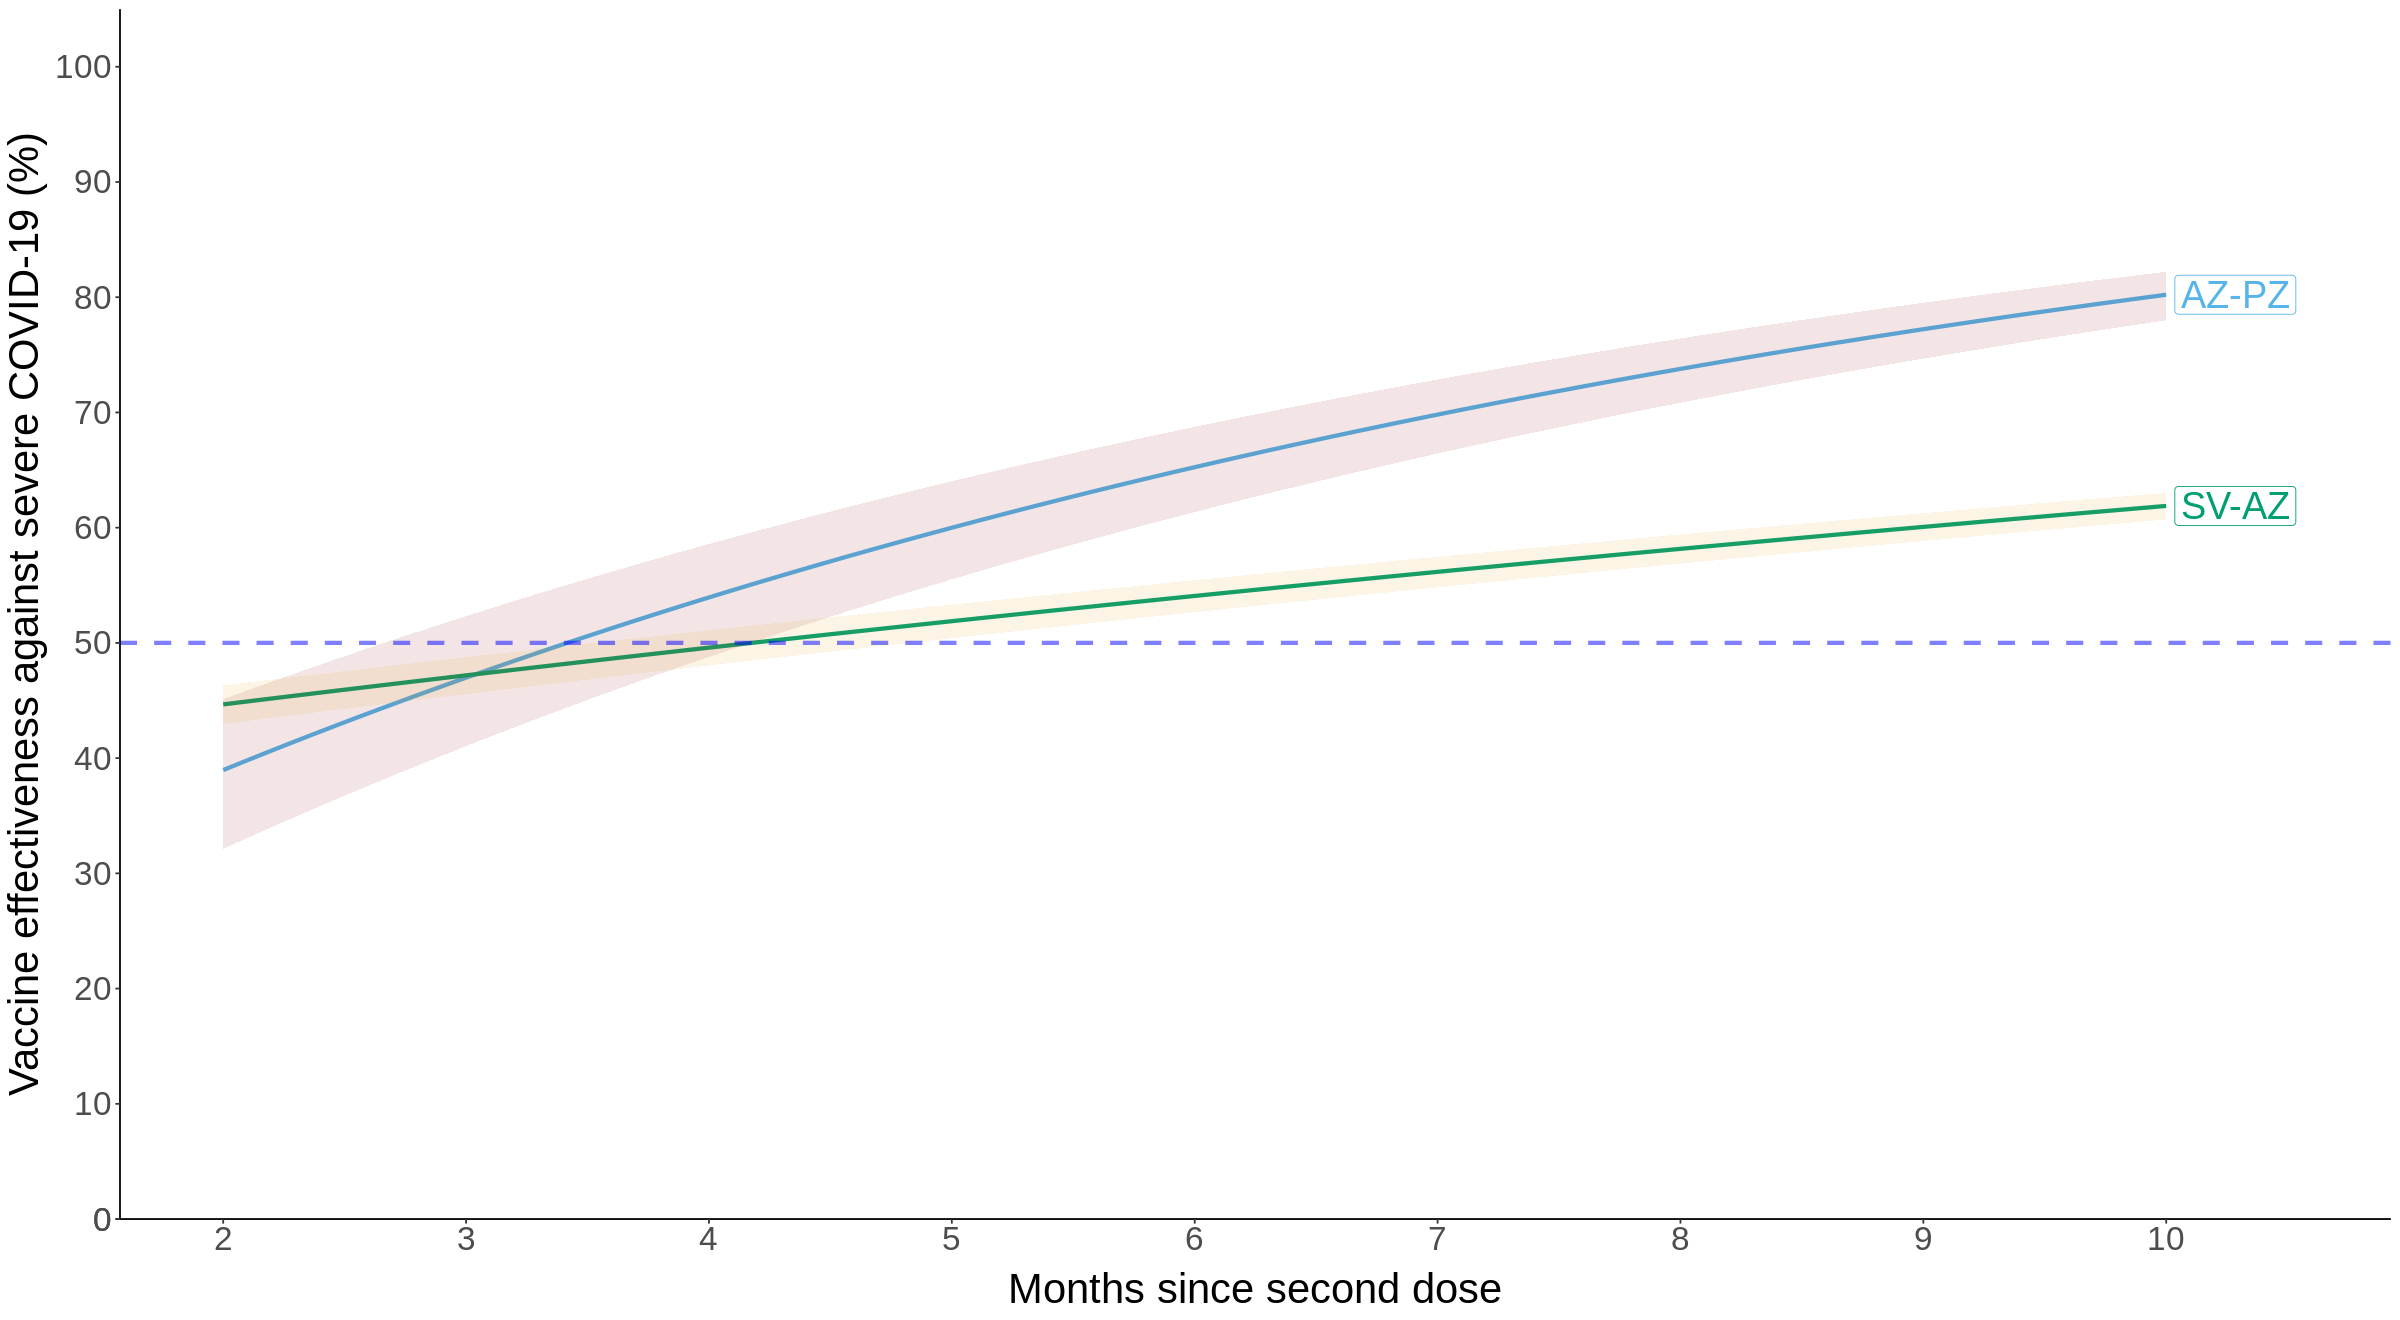

In [ ]:
ggplot()+geom_line(dat=model_d2_s,aes(x=Time,y=ve,col=seq,group=seq),show.legend = FALSE,size=1.2)+
  geom_ribbon(dat=model_d2_s,aes(x=Time,y=ve,ymax=uve,ymin=lve,fill=seq,group=seq),alpha=0.1,show.legend = FALSE)+
  geom_hline(yintercept = 50,col="blue",linetype=2,size=1.2,alpha=0.5)+
  geom_label_repel(data = unique(model_d2_s[order(-Time)],by=c("seq")),
                   aes(label = seq,x=Time,y=ve,col=seq),
                   nudge_x = 0.25,
                   size=8,
                   na.rm = TRUE,show.legend = FALSE)+
  scale_fill_manual(values = safe_colorblind_palette)+
  scale_color_manual(values = safe_colorblind_palette[3:5])+
  scale_x_continuous(breaks = 2:10,limits = c(2,10+0.5),name = "Months since second dose")+
  scale_y_continuous(expand=c(0,0), limits = c(0,105),breaks = c(0,0:10*10),name = "Vaccine effectiveness against severe COVID-19 (%)")+
  theme_classic()+
  theme(axis.text.x = element_text(size=20),
        axis.title.x = element_text(size=25,margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.y = element_text(size=20),
        axis.title.y = element_text(size=25,margin = margin(t = 0, r = 5, b = 0, l = 0)))

# **Regression model for 3-dose vaccination against severe COVID-19**

In [ ]:
d3_severe<-stratum[inf_type=="Severe" & dose == 3]
d3_severe<-d3_severe[,c("province_household", "agegroup", "gender", "vac_type", "inf_type", "vac_date", "inf_date","month","a","b","c","d")]
d3_severe$male<-d3_severe$gender=="ชาย"

d3_severe_a<-d3_severe[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","a")]
names(d3_severe_a)[7]<-"Freq"
d3_severe_a$severe<-TRUE

d3_severe_b<-d3_severe[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","b")]
names(d3_severe_b)[7]<-"Freq"
d3_severe_b$vac_type<-"None"
d3_severe_b<-unique(d3_severe_b,by=c("province_household", "agegroup", "male", "vac_date", "month"))
d3_severe_b$severe<-TRUE

d3_severe_c<-d3_severe[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","c")]
names(d3_severe_c)[7]<-"Freq"
d3_severe_c$severe<-FALSE

d3_severe_d<-d3_severe[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","d")]
names(d3_severe_d)[7]<-"Freq"
d3_severe_d$vac_type<-"None"
d3_severe_d<-unique(d3_severe_d,by=c("province_household", "agegroup", "male", "vac_date", "month"))
d3_severe_d$severe<-FALSE

d3_s<-rbind(d3_severe_a,d3_severe_b,d3_severe_c,d3_severe_d)

In [ ]:
d3_s$agegroup<-factor(d3_s$agegroup,levels = c("21-40","12-20","41-60","61-80","Over 80"))
d3_s$vac_type<-factor(d3_s$vac_type,levels=c("None","SV-AZ-AZ","SV-AZ-PZ","SP-SP-PZ","AZ-AZ-PZ","AZ-AZ-MD"))
d3_s$vac_date<-factor(d3_s$vac_date,levels = c("2021-05","2021-06","2021-07","2021-08","2021-09",
                                               "2021-10","2021-11","2021-12","2022-01","2022-02",
                                               "2022-03","2022-04","2022-05"))
namep<-unique(d3_s[province_household !="กรุงเทพมหานคร"]$province_household)
d3_s$province_household<-factor(d3_s$province_household,levels = c("กรุงเทพมหานคร",namep))

In [ ]:
model_d3_s_simple<-glm(severe ~ vac_type+vac_date+male+agegroup+province_household+month, binomial, weight=Freq, data=d3_s) 
logistic.display(model_d3_s_simple)

,crude OR(95%CI),adj. OR(95%CI),P(Wald's test),P(LR-test)
vac_type: ref.=None,,,,< 0.001
SV-AZ-AZ,"0.23 (0.18,0.31)","0.19 (0.14,0.26)",< 0.001,
SV-AZ-PZ,"0.3 (0.25,0.35)","0.26 (0.22,0.31)",< 0.001,
SP-SP-PZ,"0.22 (0.17,0.29)","0.21 (0.16,0.28)",< 0.001,
AZ-AZ-PZ,"0.56 (0.5,0.63)","0.23 (0.21,0.26)",< 0.001,
AZ-AZ-MD,"0.58 (0.45,0.74)","0.23 (0.18,0.3)",< 0.001,
,,,,
vac_date: ref.=2021-05,,,,< 0.001
2021-06,"0.91 (0.88,0.93)","0.93 (0.91,0.96)",< 0.001,
2021-07,"0.84 (0.82,0.87)","0.91 (0.88,0.93)",< 0.001,


In [ ]:
model_d3_s_wti<-glm(severe ~ vac_type*month+vac_date*month+male+agegroup+
                      province_household, binomial, weight=Freq, data=d3_s) 
summary(model_d3_s_wti)


Call:
glm(formula = severe ~ vac_type * month + vac_date * month + 
    male + agegroup + province_household, family = binomial, 
    data = d3_s, weights = Freq)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-13.65    0.00    0.00    0.00   48.87  

Coefficients: (1 not defined because of singularities)
                                 Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                     -9.949277   0.023134 -430.074  < 2e-16 ***
vac_typeSV-AZ-AZ                -0.817976   0.417606   -1.959 0.050145 .  
vac_typeSV-AZ-PZ                -1.168828   0.246736   -4.737 2.17e-06 ***
vac_typeSP-SP-PZ                -1.319192   0.390352   -3.379 0.000726 ***
vac_typeAZ-AZ-PZ                -1.191100   0.172874   -6.890 5.58e-12 ***
vac_typeAZ-AZ-MD                -0.708142   0.347766   -2.036 0.041724 *  
month                           -0.153771   0.002527  -60.844  < 2e-16 ***
vac_date2021-06                 -0.339527   0.027296  -12.439  < 2e-16 ***
v

In [ ]:
model_d3_s_sv_az_az<-data.frame(Time=c(200:700)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:700){
  model_d3_s_sv_az_az$ve[model_d3_s_sv_az_az$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSV-AZ-AZ"]
                                                                           +(t/100)*model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSV-AZ-AZ:month"])*100,7)
  model_d3_s_sv_az_az$lve[model_d3_s_sv_az_az$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSV-AZ-AZ"]
                                                                            +qnorm(0.975)*sqrt(diag(vcov(model_d3_s_wti)))[names(sqrt(diag(vcov(model_d3_s_wti))))=="vac_typeSV-AZ-AZ:month"]
                                                                            +(t/100)*(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSV-AZ-AZ:month"]))*100,7)
  model_d3_s_sv_az_az$uve[model_d3_s_sv_az_az$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSV-AZ-AZ"]
                                                                            -qnorm(0.975)*sqrt(diag(vcov(model_d3_s_wti)))[names(sqrt(diag(vcov(model_d3_s_wti))))=="vac_typeSV-AZ-AZ:month"]
                                                                            +(t/100)*(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSV-AZ-AZ:month"]))*100,7)}
model_d3_s_sv_az_az$seq<-"SV-AZ-AZ"

model_d3_s_sv_az_pz<-data.frame(Time=c(200:700)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:700){
  model_d3_s_sv_az_pz$ve[model_d3_s_sv_az_pz$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSV-AZ-PZ"]
                                                                           +(t/100)*model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSV-AZ-PZ:month"])*100,7)
  model_d3_s_sv_az_pz$lve[model_d3_s_sv_az_pz$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSV-AZ-PZ"]
                                                                            +qnorm(0.975)*sqrt(diag(vcov(model_d3_s_wti)))[names(sqrt(diag(vcov(model_d3_s_wti))))=="vac_typeSV-AZ-PZ:month"]
                                                                            +(t/100)*(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSV-AZ-PZ:month"]))*100,7)
  model_d3_s_sv_az_pz$uve[model_d3_s_sv_az_pz$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSV-AZ-PZ"]
                                                                            -qnorm(0.975)*sqrt(diag(vcov(model_d3_s_wti)))[names(sqrt(diag(vcov(model_d3_s_wti))))=="vac_typeSV-AZ-PZ:month"]
                                                                            +(t/100)*(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSV-AZ-PZ:month"]))*100,7)}
model_d3_s_sv_az_pz$seq<-"SV-AZ-PZ"


model_d3_s_sp_sp_pz<-data.frame(Time=c(200:700)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:700){
  model_d3_s_sp_sp_pz$ve[model_d3_s_sp_sp_pz$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSP-SP-PZ"]
                                                                           +(t/100)*model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSP-SP-PZ:month"])*100,7)
  model_d3_s_sp_sp_pz$lve[model_d3_s_sp_sp_pz$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSP-SP-PZ"]
                                                                            +qnorm(0.975)*sqrt(diag(vcov(model_d3_s_wti)))[names(sqrt(diag(vcov(model_d3_s_wti))))=="vac_typeSP-SP-PZ:month"]
                                                                            +(t/100)*(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSP-SP-PZ:month"]))*100,7)
  model_d3_s_sp_sp_pz$uve[model_d3_s_sp_sp_pz$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSP-SP-PZ"]
                                                                            -qnorm(0.975)*sqrt(diag(vcov(model_d3_s_wti)))[names(sqrt(diag(vcov(model_d3_s_wti))))=="vac_typeSP-SP-PZ:month"]
                                                                            +(t/100)*(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeSP-SP-PZ:month"]))*100,7)}
model_d3_s_sp_sp_pz$seq<-"SP-SP-PZ"


model_d3_s_az_az_pz<-data.frame(Time=c(200:700)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:700){
  model_d3_s_az_az_pz$ve[model_d3_s_az_az_pz$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeAZ-AZ-PZ"]
                                                                           +(t/100)*model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeAZ-AZ-PZ:month"])*100,7)
  model_d3_s_az_az_pz$lve[model_d3_s_az_az_pz$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeAZ-AZ-PZ"]
                                                                            +qnorm(0.975)*sqrt(diag(vcov(model_d3_s_wti)))[names(sqrt(diag(vcov(model_d3_s_wti))))=="vac_typeAZ-AZ-PZ:month"]
                                                                            +(t/100)*(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeAZ-AZ-PZ:month"]))*100,7)
  model_d3_s_az_az_pz$uve[model_d3_s_az_az_pz$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeAZ-AZ-PZ"]
                                                                            -qnorm(0.975)*sqrt(diag(vcov(model_d3_s_wti)))[names(sqrt(diag(vcov(model_d3_s_wti))))=="vac_typeAZ-AZ-PZ:month"]
                                                                            +(t/100)*(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeAZ-AZ-PZ:month"]))*100,7)}
model_d3_s_az_az_pz$seq<-"AZ-AZ-PZ"


model_d3_s_az_az_mn<-data.frame(Time=c(200:700)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:700){
  model_d3_s_az_az_mn$ve[model_d3_s_az_az_mn$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeAZ-AZ-MD"]
                                                                           +(t/100)*model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeAZ-AZ-MD:month"])*100,7)
  model_d3_s_az_az_mn$lve[model_d3_s_az_az_mn$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeAZ-AZ-MD"]
                                                                            +qnorm(0.975)*sqrt(diag(vcov(model_d3_s_wti)))[names(sqrt(diag(vcov(model_d3_s_wti))))=="vac_typeAZ-AZ-MD:month"]
                                                                            +(t/100)*(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeAZ-AZ-MD:month"]))*100,7)
  model_d3_s_az_az_mn$uve[model_d3_s_az_az_mn$Time == t/100]<-100-round(exp(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeAZ-AZ-MD"]
                                                                            -qnorm(0.975)*sqrt(diag(vcov(model_d3_s_wti)))[names(sqrt(diag(vcov(model_d3_s_wti))))=="vac_typeAZ-AZ-MD:month"]
                                                                            +(t/100)*(model_d3_s_wti$coefficients[names(model_d3_s_wti$coefficients)=="vac_typeAZ-AZ-MD:month"]))*100,7)}
model_d3_s_az_az_mn$seq<-"AZ-AZ-MN"


model_d3_s<-as.data.table(rbind(model_d3_s_sv_az_az,model_d3_s_sv_az_pz,
                                model_d3_s_sp_sp_pz,model_d3_s_az_az_pz,
                                model_d3_s_az_az_mn))

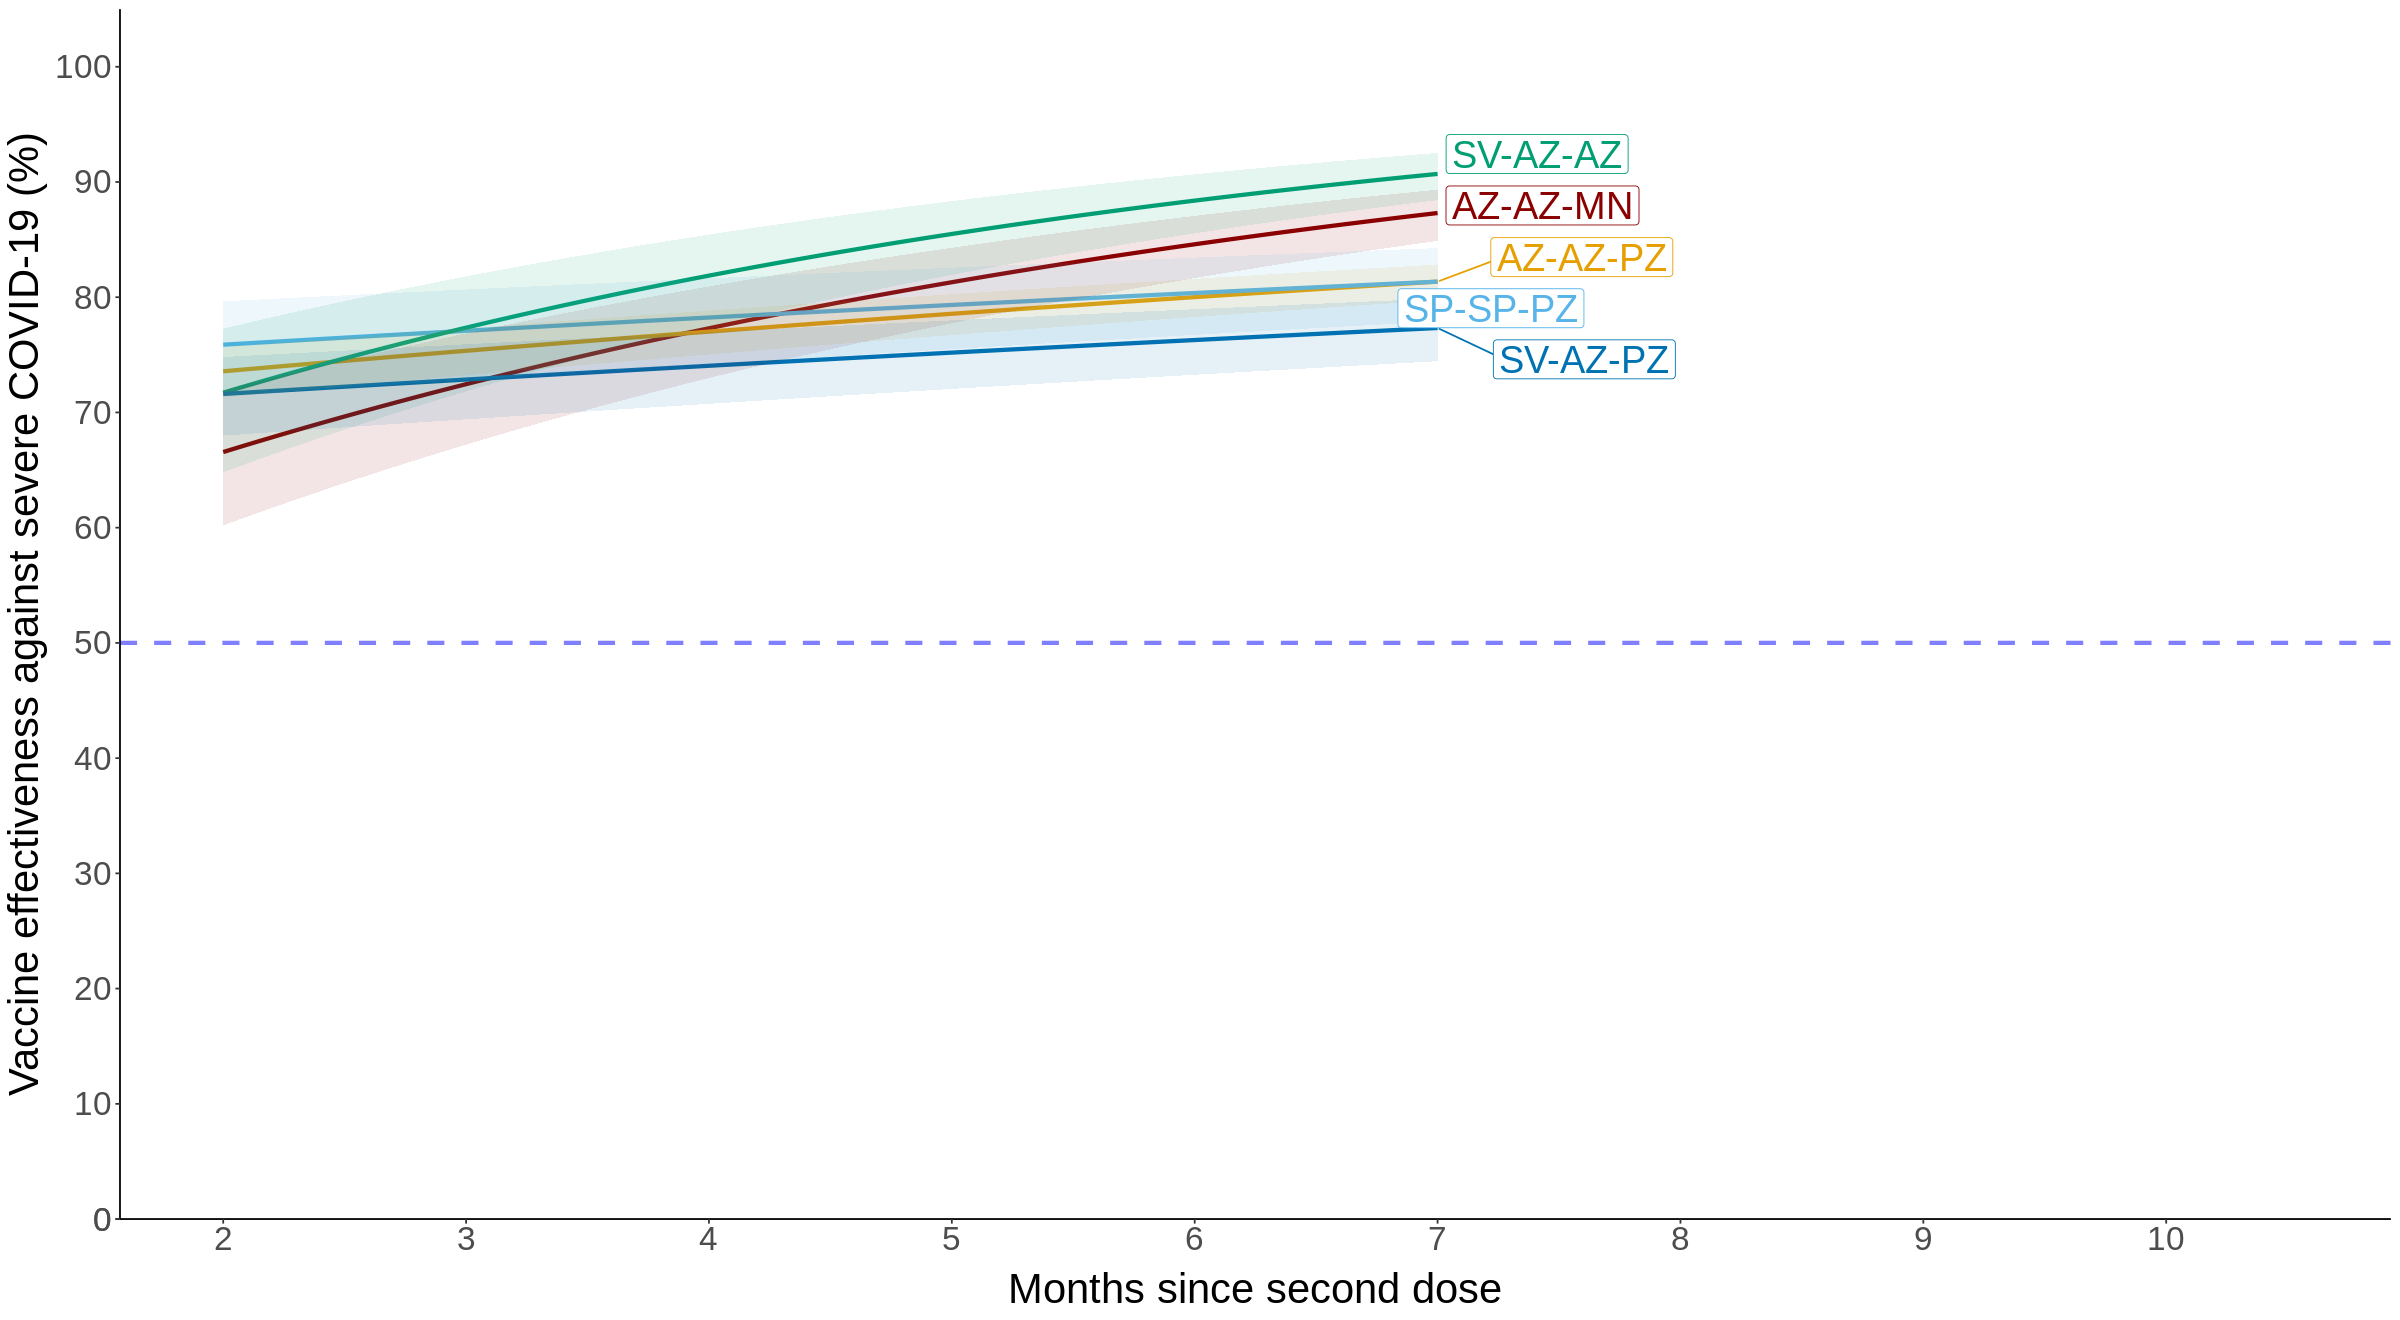

In [ ]:
ggplot()+geom_line(dat=model_d3_s,aes(x=Time,y=ve,col=seq,group=seq),show.legend = FALSE,size=1.2)+
  geom_ribbon(dat=model_d3_s,aes(x=Time,y=ve,ymax=uve,ymin=lve,fill=seq,group=seq),alpha=0.1,show.legend = FALSE)+
  geom_hline(yintercept = 50,col="blue",linetype=2,size=1.2,alpha=0.5)+
  geom_label_repel(data = unique(model_d3_s[order(-Time)],by=c("seq")),
                   aes(label = seq,x=Time,y=ve,col=seq),
                   nudge_x = 0.25,
                   size=8,
                   na.rm = TRUE,show.legend = FALSE)+
  scale_fill_manual(values = safe_colorblind_palette)+
  scale_color_manual(values = safe_colorblind_palette)+
  scale_x_continuous(breaks = 2:10,limits = c(2,10+0.5),name = "Months since second dose")+
  scale_y_continuous(expand=c(0,0), limits = c(0,105),breaks = c(0,0:10*10),name = "Vaccine effectiveness against severe COVID-19 (%)")+
  theme_classic()+
  theme(axis.text.x = element_text(size=20),
        axis.title.x = element_text(size=25,margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.y = element_text(size=20),
        axis.title.y = element_text(size=25,margin = margin(t = 0, r = 5, b = 0, l = 0)))

# **Regression model for 2-dose vaccination against death from COVID-19**

In [ ]:
d2_death<-stratum[inf_type=="Death" & dose == 2]
d2_death<-d2_death[,c("province_household", "agegroup", "gender", "vac_type", "inf_type", "vac_date", "inf_date","month","a","b","c","d")]
d2_death$male<-d2_death$gender=="ชาย"

d2_death_a<-d2_death[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","a")]
names(d2_death_a)[7]<-"Freq"
d2_death_a$death<-TRUE


d2_death_b<-d2_death[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","b")]
names(d2_death_b)[7]<-"Freq"
d2_death_b$vac_type<-"None"
d2_death_b<-unique(d2_death_b,by=c("province_household", "agegroup", "male", "vac_date", "month"))
d2_death_b$death<-TRUE


d2_death_c<-d2_death[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","c")]
names(d2_death_c)[7]<-"Freq"
d2_death_c$death<-FALSE

d2_death_d<-d2_death[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","d")]
names(d2_death_d)[7]<-"Freq"
d2_death_d$vac_type<-"None"
d2_death_d<-unique(d2_death_d,by=c("province_household", "agegroup", "male", "vac_date", "month"))
d2_death_d$death<-FALSE

d2_d<-rbind(d2_death_a,d2_death_b,d2_death_c,d2_death_d)

In [ ]:
d2_d$agegroup<-factor(d2_d$agegroup,levels = c("21-40","12-20","41-60","61-80","Over 80"))
d2_d$vac_type<-factor(d2_d$vac_type,levels=c("None","AZ-PZ","SV-AZ"))
d2_d$vac_date<-factor(d2_d$vac_date,levels = c("2021-05","2021-06","2021-07","2021-08","2021-09",
                                               "2021-10","2021-11","2021-12","2022-01","2022-02",
                                               "2022-03","2022-04"))
namep<-unique(d2_d[province_household !="กรุงเทพมหานคร"]$province_household)
d2_d$province_household<-factor(d2_d$province_household,levels = c("กรุงเทพมหานคร",namep)) #Bangkok, the capital, as a reference

In [ ]:
model_d2_d_dimple<-glm(death ~ vac_type+vac_date+male+agegroup+province_household+month, binomial, weight=Freq, data=d2_d) 
logistic.display(model_d2_d_dimple)

ERROR: ignored

In [ ]:
model_d2_d_wti<-glm(death ~ vac_type*month+vac_date*month+male+agegroup+
                      province_household, binomial, weight=Freq, data=d2_d) 
summary(model_d2_d_wti)


Call:
glm(formula = severe ~ vac_type * month + vac_date * month + 
    male + agegroup + province_household, family = binomial, 
    data = d2_d, weights = Freq)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-7.196  -0.085   0.000   0.000  56.090  

Coefficients:
                                  Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                     -13.134616   0.038611 -340.180  < 2e-16 ***
vac_typeAZ-PZ                     1.491639   0.225534    6.614 3.75e-11 ***
vac_typeSV-AZ                     0.760994   0.091941    8.277  < 2e-16 ***
month                             0.017585   0.003173    5.543 2.98e-08 ***
vac_date2021-06                  -0.153335   0.043479   -3.527 0.000421 ***
vac_date2021-07                  -0.748549   0.050931  -14.697  < 2e-16 ***
vac_date2021-08                  -0.704452   0.055026  -12.802  < 2e-16 ***
vac_date2021-09                  -0.736876   0.061222  -12.036  < 2e-16 ***
vac_date2021-10                  

In [ ]:
model_d2_d_sv_az<-data.frame(Time=c(200:1000)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:1000){
  model_d2_d_sv_az$ve[model_d2_d_sv_az$Time == t/100]<-100-round(exp(model_d2_d_wti$coefficients[names(model_d2_d_wti$coefficients)=="vac_typeSV-AZ"]
                                                                     +(t/100)*model_d2_d_wti$coefficients[names(model_d2_d_wti$coefficients)=="vac_typeSV-AZ:month"])*100,7)
  model_d2_d_sv_az$lve[model_d2_d_sv_az$Time == t/100]<-100-round(exp(model_d2_d_wti$coefficients[names(model_d2_d_wti$coefficients)=="vac_typeSV-AZ"]
                                                                      +qnorm(0.975)*sqrt(diag(vcov(model_d2_d_wti)))[names(sqrt(diag(vcov(model_d2_d_wti))))=="vac_typeSV-AZ:month"]
                                                                      +(t/100)*(model_d2_d_wti$coefficients[names(model_d2_d_wti$coefficients)=="vac_typeSV-AZ:month"]))*100,7)
  model_d2_d_sv_az$uve[model_d2_d_sv_az$Time == t/100]<-100-round(exp(model_d2_d_wti$coefficients[names(model_d2_d_wti$coefficients)=="vac_typeSV-AZ"]
                                                                      -qnorm(0.975)*sqrt(diag(vcov(model_d2_d_wti)))[names(sqrt(diag(vcov(model_d2_d_wti))))=="vac_typeSV-AZ:month"]
                                                                      +(t/100)*(model_d2_d_wti$coefficients[names(model_d2_d_wti$coefficients)=="vac_typeSV-AZ:month"]))*100,7)}
model_d2_d_sv_az$seq<-"SV-AZ"


model_d2_d_az_pz<-data.frame(Time=c(200:1000)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:1000){
  model_d2_d_az_pz$ve[model_d2_d_az_pz$Time == t/100]<-100-round(exp(model_d2_d_wti$coefficients[names(model_d2_d_wti$coefficients)=="vac_typeAZ-PZ"]
                                                                     +(t/100)*model_d2_d_wti$coefficients[names(model_d2_d_wti$coefficients)=="vac_typeAZ-PZ:month"])*100,7)
  model_d2_d_az_pz$lve[model_d2_d_az_pz$Time == t/100]<-100-round(exp(model_d2_d_wti$coefficients[names(model_d2_d_wti$coefficients)=="vac_typeAZ-PZ"]
                                                                      +qnorm(0.975)*sqrt(diag(vcov(model_d2_d_wti)))[names(sqrt(diag(vcov(model_d2_d_wti))))=="vac_typeAZ-PZ:month"]
                                                                      +(t/100)*(model_d2_d_wti$coefficients[names(model_d2_d_wti$coefficients)=="vac_typeAZ-PZ:month"]))*100,7)
  model_d2_d_az_pz$uve[model_d2_d_az_pz$Time == t/100]<-100-round(exp(model_d2_d_wti$coefficients[names(model_d2_d_wti$coefficients)=="vac_typeAZ-PZ"]
                                                                      -qnorm(0.975)*sqrt(diag(vcov(model_d2_d_wti)))[names(sqrt(diag(vcov(model_d2_d_wti))))=="vac_typeAZ-PZ:month"]
                                                                      +(t/100)*(model_d2_d_wti$coefficients[names(model_d2_d_wti$coefficients)=="vac_typeAZ-PZ:month"]))*100,7)}
model_d2_d_az_pz$seq<-"AZ-PZ"
model_d2_d<-as.data.table(rbind(model_d2_d_sv_az,model_d2_d_az_pz))

Warning message:
“Removed 550 row(s) containing missing values (geom_path).”


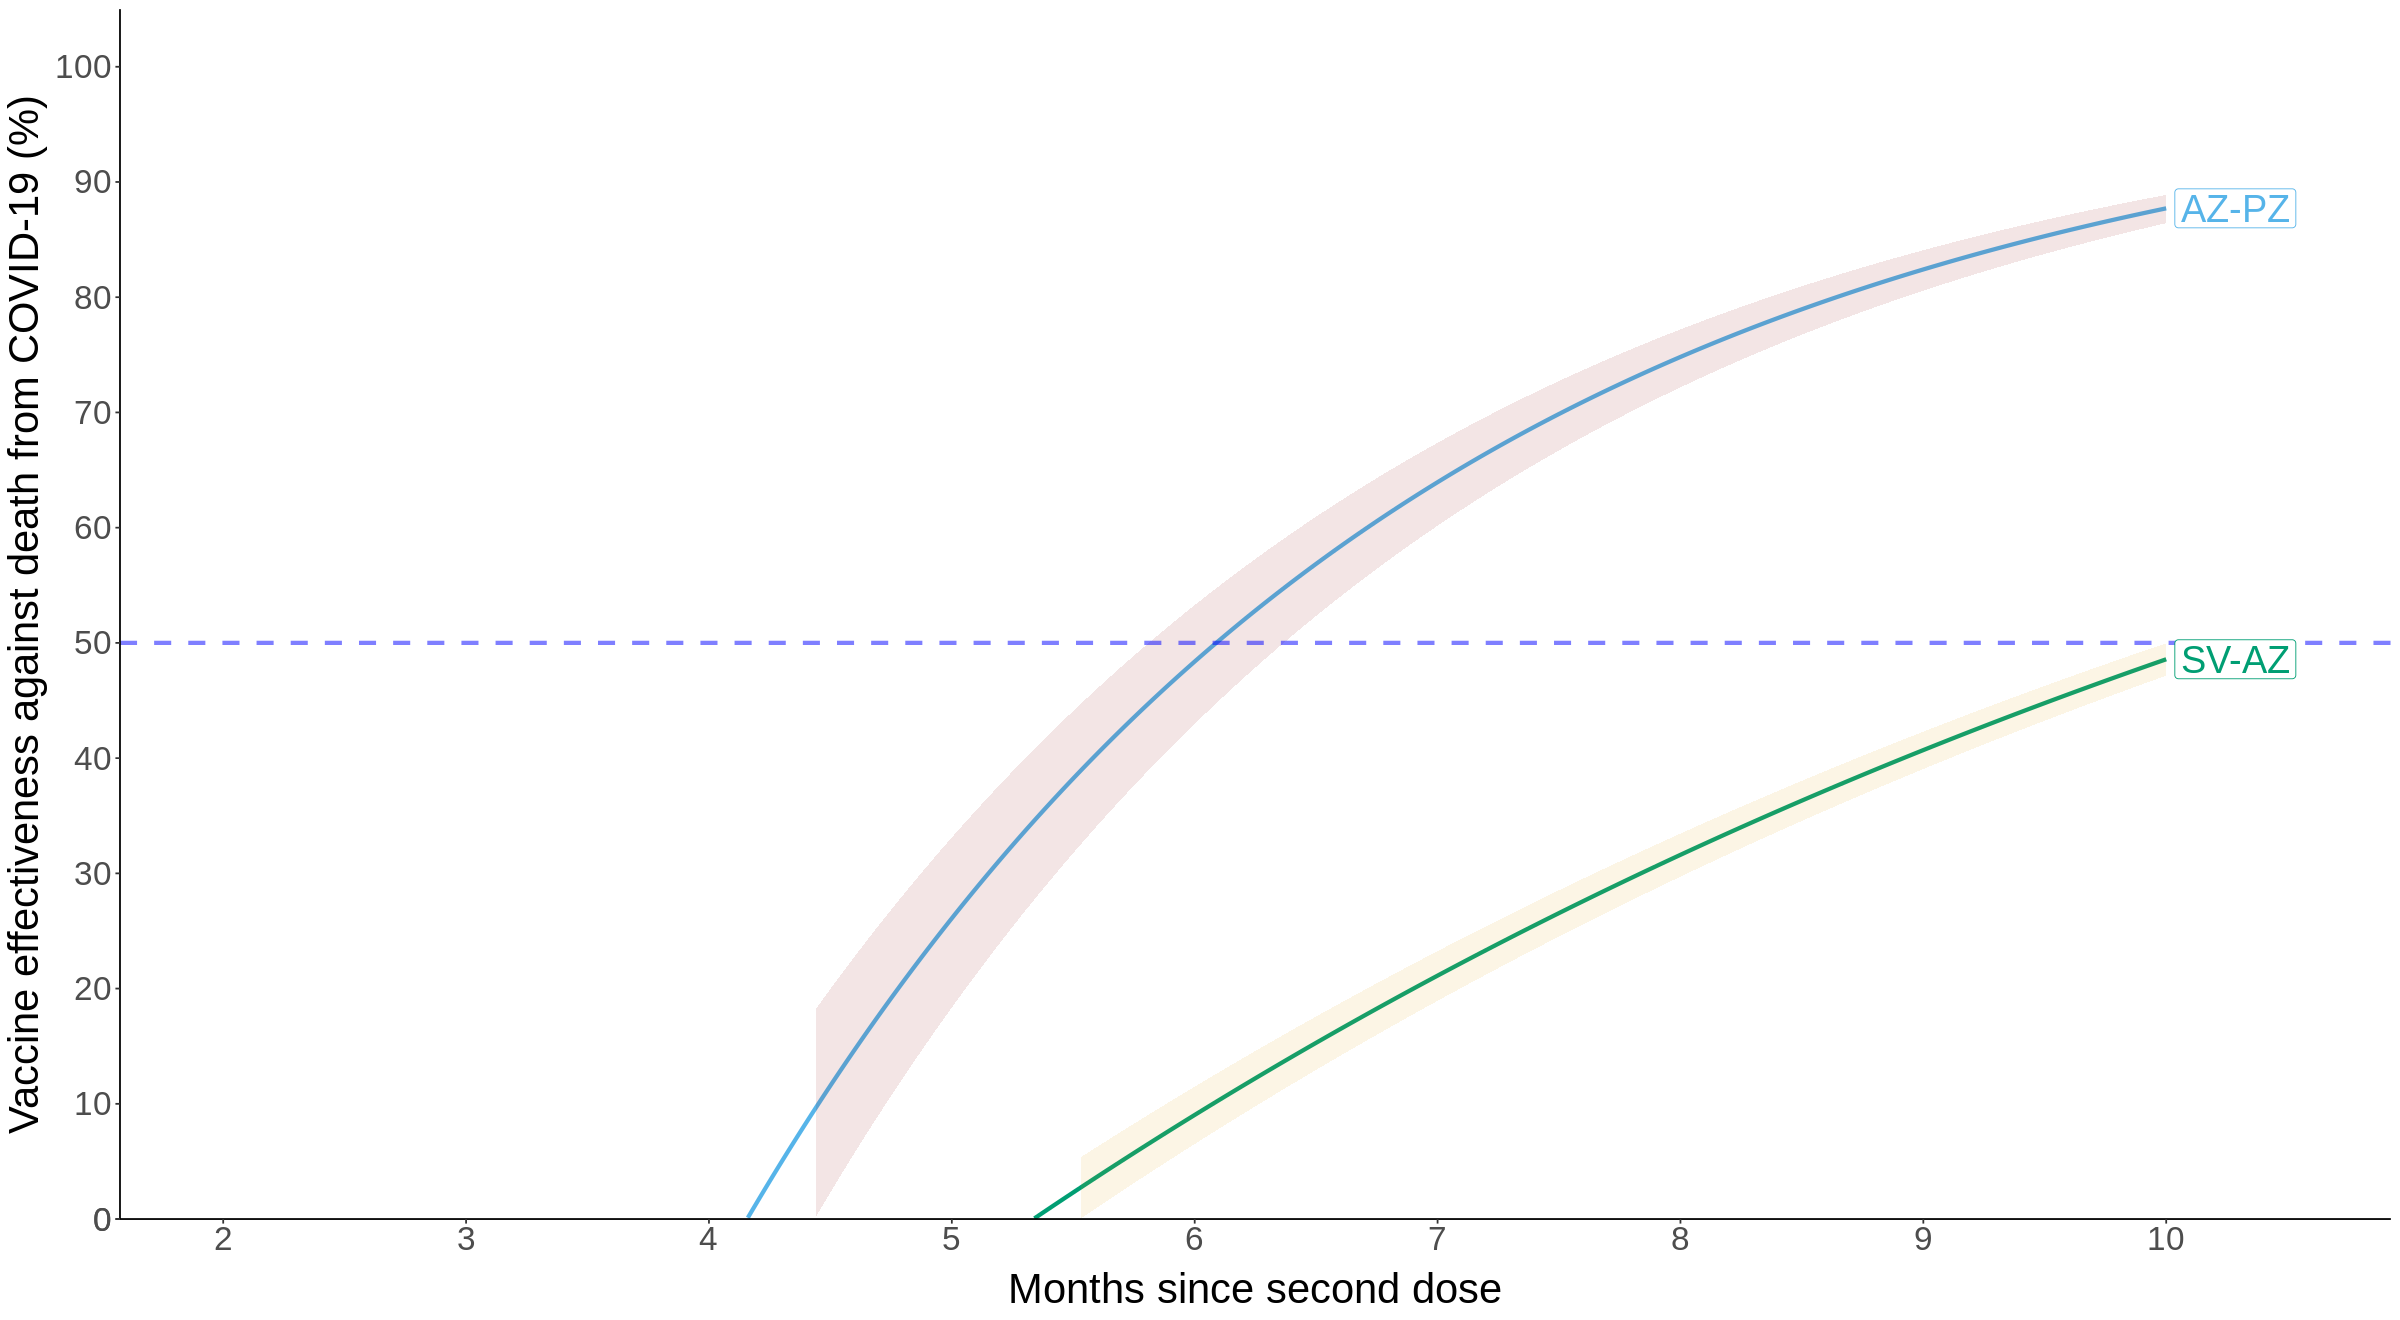

In [ ]:
ggplot()+geom_line(dat=model_d2_d,aes(x=Time,y=ve,col=seq,group=seq),show.legend = FALSE,size=1.2)+
  geom_ribbon(dat=model_d2_d,aes(x=Time,y=ve,ymax=uve,ymin=lve,fill=seq,group=seq),alpha=0.1,show.legend = FALSE)+
  geom_hline(yintercept = 50,col="blue",linetype=2,size=1.2,alpha=0.5)+
  geom_label_repel(data = unique(model_d2_d[order(-Time)],by=c("seq")),
                   aes(label = seq,x=Time,y=ve,col=seq),
                   nudge_x = 0.25,
                   size=8,
                   na.rm = TRUE,show.legend = FALSE)+
  scale_fill_manual(values = safe_colorblind_palette)+
  scale_color_manual(values = safe_colorblind_palette[3:5])+
  scale_x_continuous(breaks = 2:10,limits = c(2,10+0.5),name = "Months since second dose")+
  scale_y_continuous(expand=c(0,0), limits = c(0,105),breaks = c(0,0:10*10),name = "Vaccine effectiveness against death from COVID-19 (%)")+
  theme_classic()+
  theme(axis.text.x = element_text(size=20),
        axis.title.x = element_text(size=25,margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.y = element_text(size=20),
        axis.title.y = element_text(size=25,margin = margin(t = 0, r = 5, b = 0, l = 0)))

# **Regression model for 3-dose vaccination against severe COVID-19**

In [ ]:
d3_death<-stratum[inf_type=="Death" & dose == 3]
d3_death<-d3_death[,c("province_household", "agegroup", "gender", "vac_type", "inf_type", "vac_date", "inf_date","month","a","b","c","d")]
d3_death$male<-d3_death$gender=="ชาย"

d3_death_a<-d3_death[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","a")]
names(d3_death_a)[7]<-"Freq"
d3_death_a$death<-TRUE

d3_death_b<-d3_death[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","b")]
names(d3_death_b)[7]<-"Freq"
d3_death_b$vac_type<-"None"
d3_death_b<-unique(d3_death_b,by=c("province_household", "agegroup", "male", "vac_date", "month"))
d3_death_b$death<-TRUE

d3_death_c<-d3_death[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","c")]
names(d3_death_c)[7]<-"Freq"
d3_death_c$death<-FALSE

d3_death_d<-d3_death[,c("province_household", "agegroup", "male", "vac_type", "vac_date", "month","d")]
names(d3_death_d)[7]<-"Freq"
d3_death_d$vac_type<-"None"
d3_death_d<-unique(d3_death_d,by=c("province_household", "agegroup", "male", "vac_date", "month"))
d3_death_d$death<-FALSE

d3_d<-rbind(d3_death_a,d3_death_b,d3_death_c,d3_death_d)

In [ ]:
d3_d$agegroup<-factor(d3_d$agegroup,levels = c("21-40","12-20","41-60","61-80","Over 80"))
d3_d$vac_type<-factor(d3_d$vac_type,levels=c("None","SV-AZ-AZ","SV-AZ-PZ","SP-SP-PZ","AZ-AZ-PZ","AZ-AZ-MD"))
d3_d$vac_date<-factor(d3_d$vac_date,levels = c("2021-05","2021-06","2021-07","2021-08","2021-09",
                                               "2021-10","2021-11","2021-12","2022-01","2022-02",
                                               "2022-03","2022-04","2022-05"))
namep<-unique(d3_d[province_household !="กรุงเทพมหานคร"]$province_household)
d3_d$province_household<-factor(d3_d$province_household,levels = c("กรุงเทพมหานคร",namep))

In [ ]:
model_d3_d_simple<-glm(death ~ vac_type+vac_date+male+agegroup+province_household+month, binomial, weight=Freq, data=d3_d) 
logistic.display(model_d3_d_simple)

,crude OR(95%CI),adj. OR(95%CI),P(Wald's test),P(LR-test)
vac_type: ref.=None,,,,< 0.001
SV-AZ-AZ,"0.62 (0.5,0.77)","0.53 (0.42,0.66)",< 0.001,
SV-AZ-PZ,"0.52 (0.44,0.61)","0.42 (0.36,0.5)",< 0.001,
SP-SP-PZ,"0.31 (0.23,0.41)","0.37 (0.28,0.5)",< 0.001,
AZ-AZ-PZ,"0.62 (0.54,0.71)","0.28 (0.24,0.32)",< 0.001,
AZ-AZ-MD,"0.43 (0.3,0.61)","0.2 (0.14,0.29)",< 0.001,
,,,,
vac_date: ref.=2021-05,,,,< 0.001
2021-06,"1.04 (1.01,1.08)","1.17 (1.13,1.21)",< 0.001,
2021-07,"1.1 (1.06,1.14)","1.39 (1.34,1.44)",< 0.001,


In [ ]:
model_d3_d_wti<-glm(death ~ vac_type*month+vac_date*month+male+agegroup+
                      province_household, binomial, weight=Freq, data=d3_d) 
summary(model_d3_d_wti)


Call:
glm(formula = death ~ vac_type * month + vac_date * month + male + 
    agegroup + province_household, family = binomial, data = d3_d, 
    weights = Freq)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-7.187   0.000   0.000   0.000  56.097  

Coefficients: (1 not defined because of singularities)
                                  Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                     -13.142835   0.038691 -339.690  < 2e-16 ***
vac_typeSV-AZ-AZ                  1.699848   0.333861    5.091 3.55e-07 ***
vac_typeSV-AZ-PZ                  0.931606   0.236071    3.946 7.94e-05 ***
vac_typeSP-SP-PZ                  0.784582   0.404915    1.938 0.052666 .  
vac_typeAZ-AZ-PZ                  0.501072   0.209145    2.396 0.016584 *  
vac_typeAZ-AZ-MD                 -0.201089   0.535781   -0.375 0.707423    
month                             0.017585   0.003173    5.543 2.98e-08 ***
vac_date2021-06                  -0.153451   0.043479   -3.529 0.0004

In [ ]:
model_d3_d_dv_az_az<-data.frame(Time=c(200:700)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:700){
  model_d3_d_dv_az_az$ve[model_d3_d_dv_az_az$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSV-AZ-AZ"]
                                                                           +(t/100)*model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSV-AZ-AZ:month"])*100,7)
  model_d3_d_dv_az_az$lve[model_d3_d_dv_az_az$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSV-AZ-AZ"]
                                                                            +qnorm(0.975)*sqrt(diag(vcov(model_d3_d_wti)))[names(sqrt(diag(vcov(model_d3_d_wti))))=="vac_typeSV-AZ-AZ:month"]
                                                                            +(t/100)*(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSV-AZ-AZ:month"]))*100,7)
  model_d3_d_dv_az_az$uve[model_d3_d_dv_az_az$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSV-AZ-AZ"]
                                                                            -qnorm(0.975)*sqrt(diag(vcov(model_d3_d_wti)))[names(sqrt(diag(vcov(model_d3_d_wti))))=="vac_typeSV-AZ-AZ:month"]
                                                                            +(t/100)*(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSV-AZ-AZ:month"]))*100,7)}
model_d3_d_dv_az_az$seq<-"SV-AZ-AZ"

model_d3_d_dv_az_pz<-data.frame(Time=c(200:700)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:700){
  model_d3_d_dv_az_pz$ve[model_d3_d_dv_az_pz$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSV-AZ-PZ"]
                                                                           +(t/100)*model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSV-AZ-PZ:month"])*100,7)
  model_d3_d_dv_az_pz$lve[model_d3_d_dv_az_pz$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSV-AZ-PZ"]
                                                                            +qnorm(0.975)*sqrt(diag(vcov(model_d3_d_wti)))[names(sqrt(diag(vcov(model_d3_d_wti))))=="vac_typeSV-AZ-PZ:month"]
                                                                            +(t/100)*(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSV-AZ-PZ:month"]))*100,7)
  model_d3_d_dv_az_pz$uve[model_d3_d_dv_az_pz$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSV-AZ-PZ"]
                                                                            -qnorm(0.975)*sqrt(diag(vcov(model_d3_d_wti)))[names(sqrt(diag(vcov(model_d3_d_wti))))=="vac_typeSV-AZ-PZ:month"]
                                                                            +(t/100)*(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSV-AZ-PZ:month"]))*100,7)}
model_d3_d_dv_az_pz$seq<-"SV-AZ-PZ"


model_d3_d_dp_dp_pz<-data.frame(Time=c(200:700)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:700){
  model_d3_d_dp_dp_pz$ve[model_d3_d_dp_dp_pz$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSP-SP-PZ"]
                                                                           +(t/100)*model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSP-SP-PZ:month"])*100,7)
  model_d3_d_dp_dp_pz$lve[model_d3_d_dp_dp_pz$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSP-SP-PZ"]
                                                                            +qnorm(0.975)*sqrt(diag(vcov(model_d3_d_wti)))[names(sqrt(diag(vcov(model_d3_d_wti))))=="vac_typeSP-SP-PZ:month"]
                                                                            +(t/100)*(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSP-SP-PZ:month"]))*100,7)
  model_d3_d_dp_dp_pz$uve[model_d3_d_dp_dp_pz$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSP-SP-PZ"]
                                                                            -qnorm(0.975)*sqrt(diag(vcov(model_d3_d_wti)))[names(sqrt(diag(vcov(model_d3_d_wti))))=="vac_typeSP-SP-PZ:month"]
                                                                            +(t/100)*(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeSP-SP-PZ:month"]))*100,7)}
model_d3_d_dp_dp_pz$seq<-"SP-SP-PZ"


model_d3_d_az_az_pz<-data.frame(Time=c(200:700)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:700){
  model_d3_d_az_az_pz$ve[model_d3_d_az_az_pz$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeAZ-AZ-PZ"]
                                                                           +(t/100)*model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeAZ-AZ-PZ:month"])*100,7)
  model_d3_d_az_az_pz$lve[model_d3_d_az_az_pz$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeAZ-AZ-PZ"]
                                                                            +qnorm(0.975)*sqrt(diag(vcov(model_d3_d_wti)))[names(sqrt(diag(vcov(model_d3_d_wti))))=="vac_typeAZ-AZ-PZ:month"]
                                                                            +(t/100)*(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeAZ-AZ-PZ:month"]))*100,7)
  model_d3_d_az_az_pz$uve[model_d3_d_az_az_pz$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeAZ-AZ-PZ"]
                                                                            -qnorm(0.975)*sqrt(diag(vcov(model_d3_d_wti)))[names(sqrt(diag(vcov(model_d3_d_wti))))=="vac_typeAZ-AZ-PZ:month"]
                                                                            +(t/100)*(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeAZ-AZ-PZ:month"]))*100,7)}
model_d3_d_az_az_pz$seq<-"AZ-AZ-PZ"


model_d3_d_az_az_mn<-data.frame(Time=c(200:700)/100,ve=NA,lve=NA,uve=NA)
for(t in 200:700){
  model_d3_d_az_az_mn$ve[model_d3_d_az_az_mn$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeAZ-AZ-MD"]
                                                                           +(t/100)*model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeAZ-AZ-MD:month"])*100,7)
  model_d3_d_az_az_mn$lve[model_d3_d_az_az_mn$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeAZ-AZ-MD"]
                                                                            +qnorm(0.975)*sqrt(diag(vcov(model_d3_d_wti)))[names(sqrt(diag(vcov(model_d3_d_wti))))=="vac_typeAZ-AZ-MD:month"]
                                                                            +(t/100)*(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeAZ-AZ-MD:month"]))*100,7)
  model_d3_d_az_az_mn$uve[model_d3_d_az_az_mn$Time == t/100]<-100-round(exp(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeAZ-AZ-MD"]
                                                                            -qnorm(0.975)*sqrt(diag(vcov(model_d3_d_wti)))[names(sqrt(diag(vcov(model_d3_d_wti))))=="vac_typeAZ-AZ-MD:month"]
                                                                            +(t/100)*(model_d3_d_wti$coefficients[names(model_d3_d_wti$coefficients)=="vac_typeAZ-AZ-MD:month"]))*100,7)}
model_d3_d_az_az_mn$seq<-"AZ-AZ-MN"


model_d3_d<-as.data.table(rbind(model_d3_d_dv_az_az,model_d3_d_dv_az_pz,
                                model_d3_d_dp_dp_pz,model_d3_d_az_az_pz,
                                model_d3_d_az_az_mn))

Warning message:
“Removed 87 row(s) containing missing values (geom_path).”


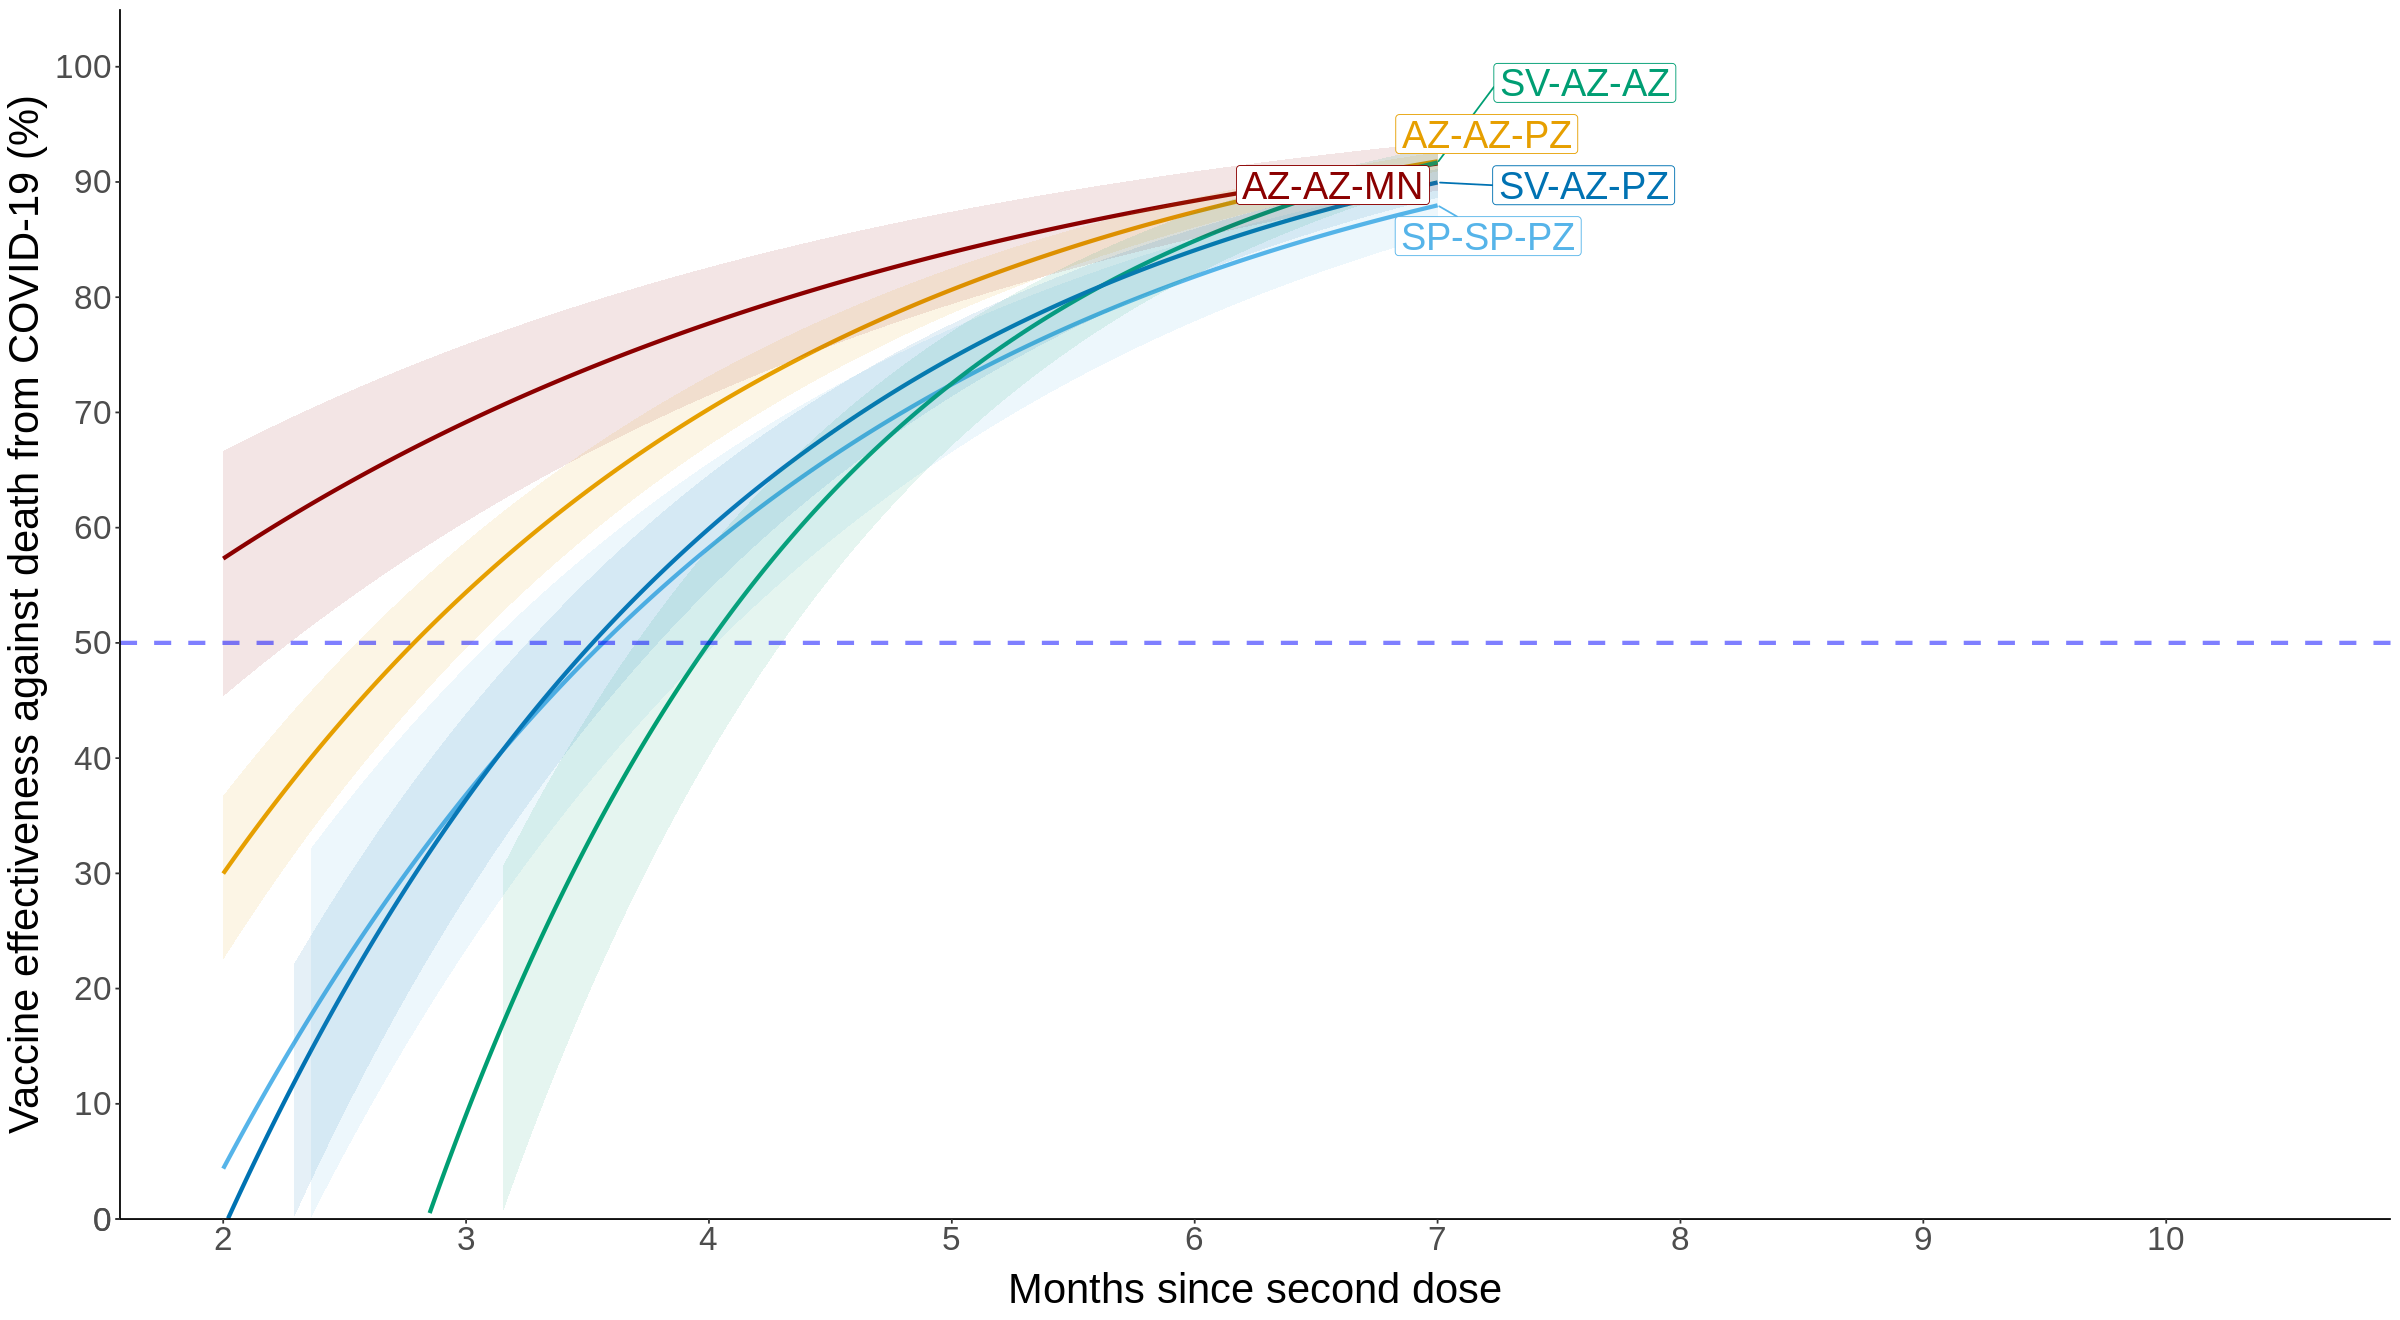

In [ ]:
ggplot()+geom_line(dat=model_d3_d,aes(x=Time,y=ve,col=seq,group=seq),show.legend = FALSE,size=1.2)+
  geom_ribbon(dat=model_d3_d,aes(x=Time,y=ve,ymax=uve,ymin=lve,fill=seq,group=seq),alpha=0.1,show.legend = FALSE)+
  geom_hline(yintercept = 50,col="blue",linetype=2,size=1.2,alpha=0.5)+
  geom_label_repel(data = unique(model_d3_d[order(-Time)],by=c("seq")),
                   aes(label = seq,x=Time,y=ve,col=seq),
                   nudge_x = 0.25,
                   size=8,
                   na.rm = TRUE,show.legend = FALSE)+
  scale_fill_manual(values = safe_colorblind_palette)+
  scale_color_manual(values = safe_colorblind_palette)+
  scale_x_continuous(breaks = 2:10,limits = c(2,10+0.5),name = "Months since second dose")+
  scale_y_continuous(expand=c(0,0), limits = c(0,105),breaks = c(0,0:10*10),name = "Vaccine effectiveness against death from COVID-19 (%)")+
  theme_classic()+
  theme(axis.text.x = element_text(size=20),
        axis.title.x = element_text(size=25,margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.text.y = element_text(size=20),
        axis.title.y = element_text(size=25,margin = margin(t = 0, r = 5, b = 0, l = 0)))